# hw2: Решающие деревья

*Спасибо великому курсу великого Евгения Соколова*

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [3]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [4]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

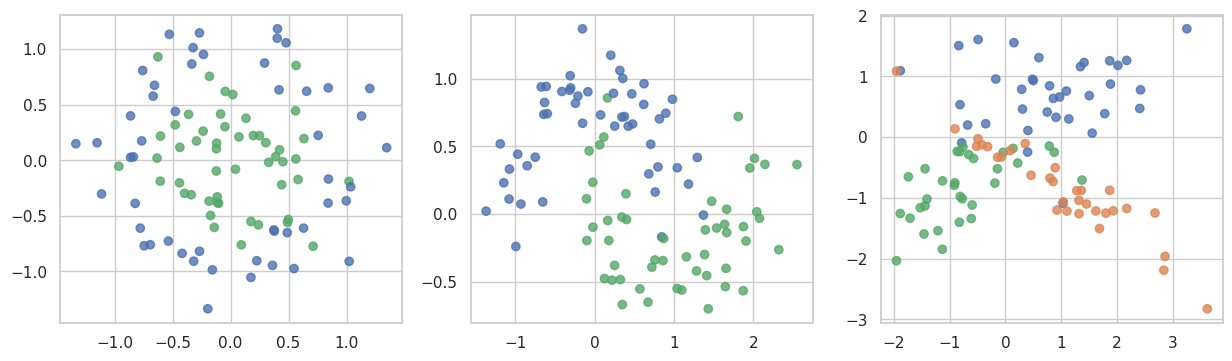

In [5]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [6]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

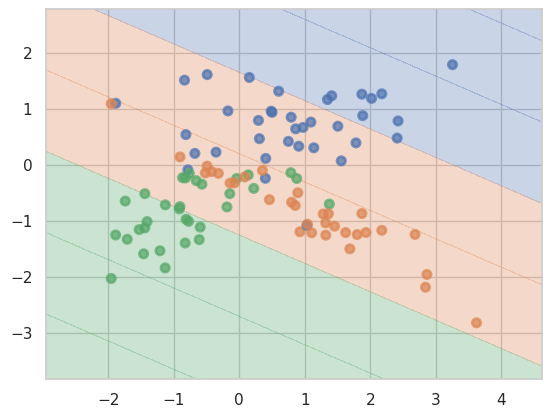

In [7]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

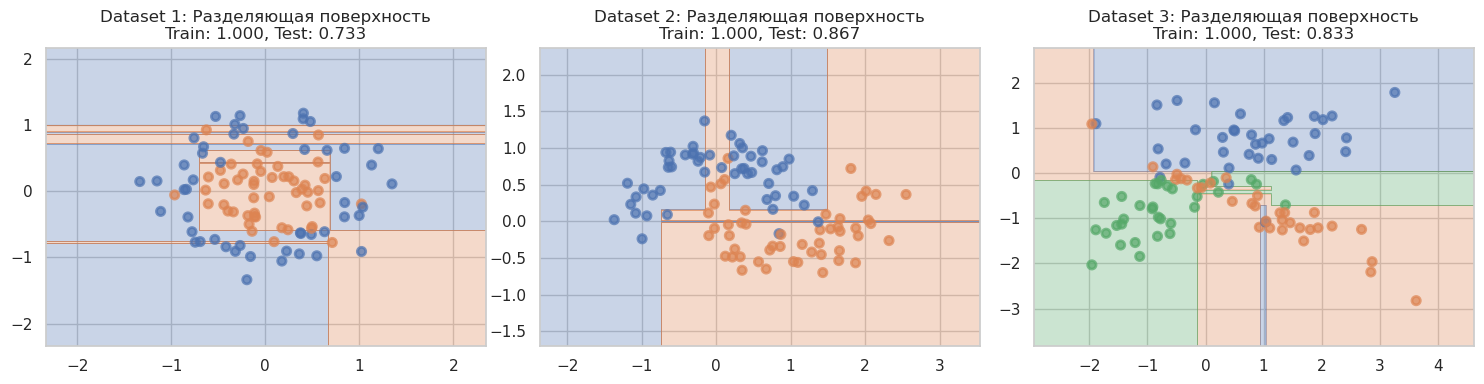

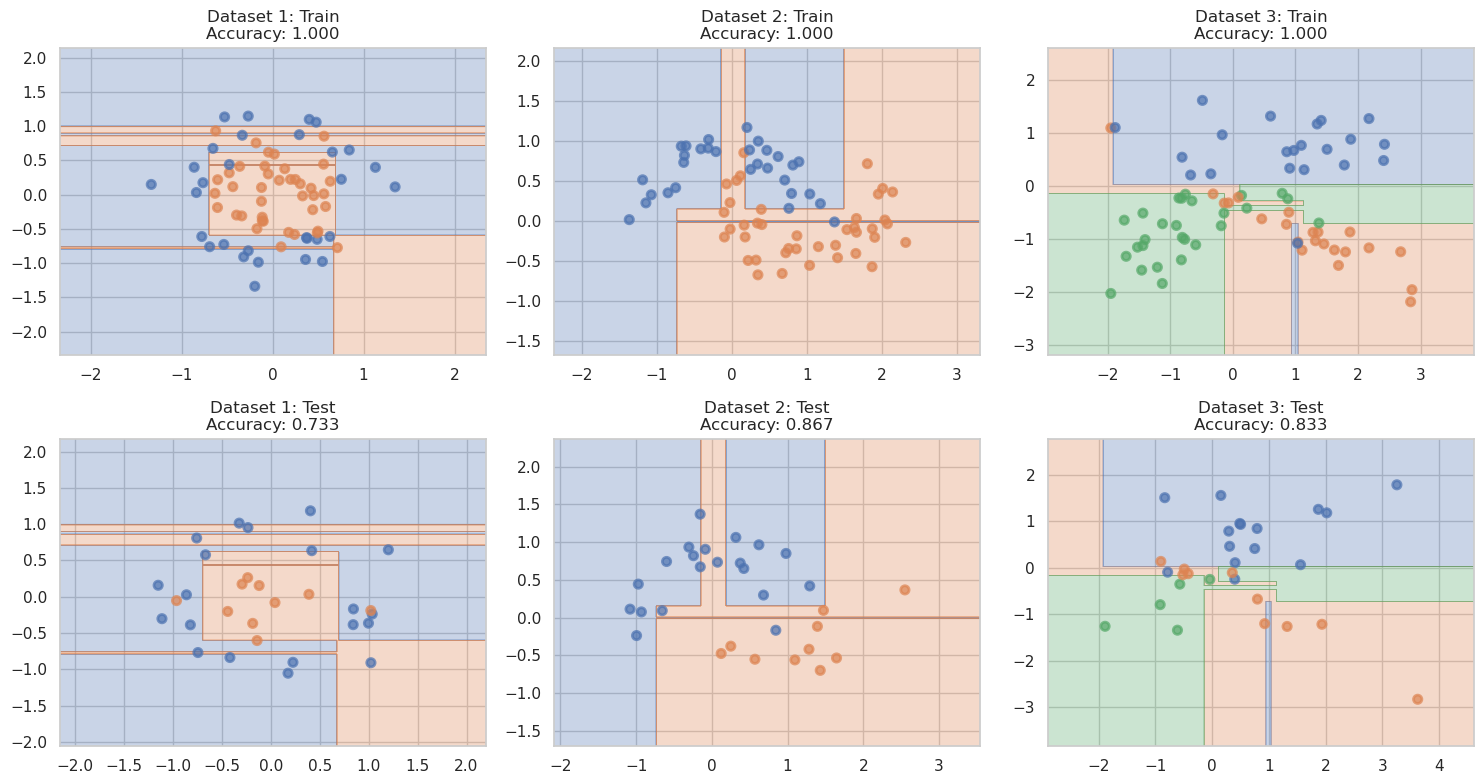

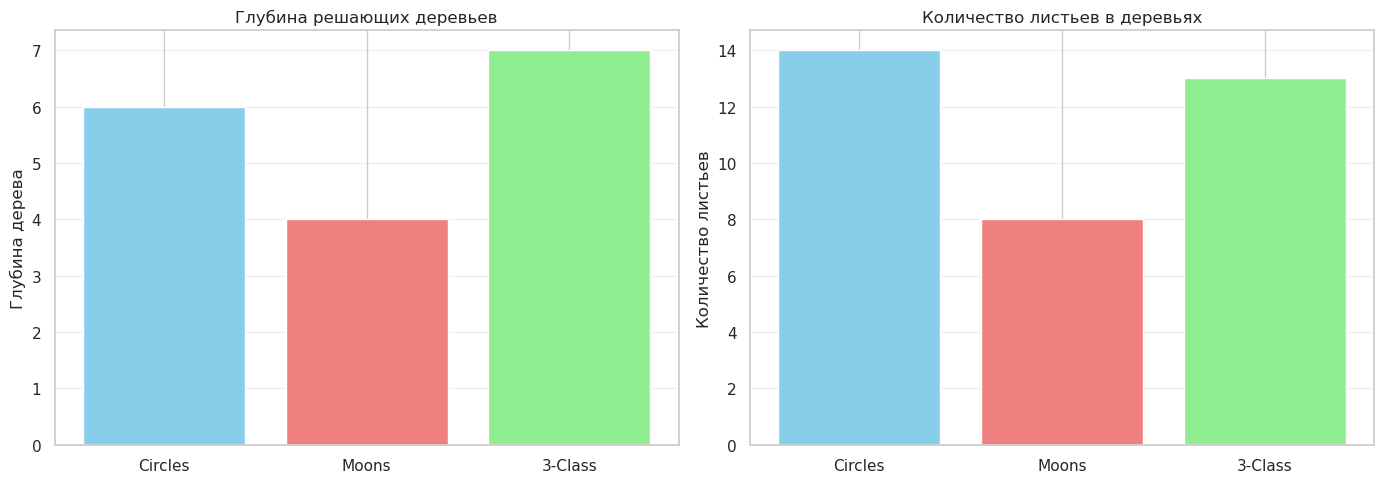

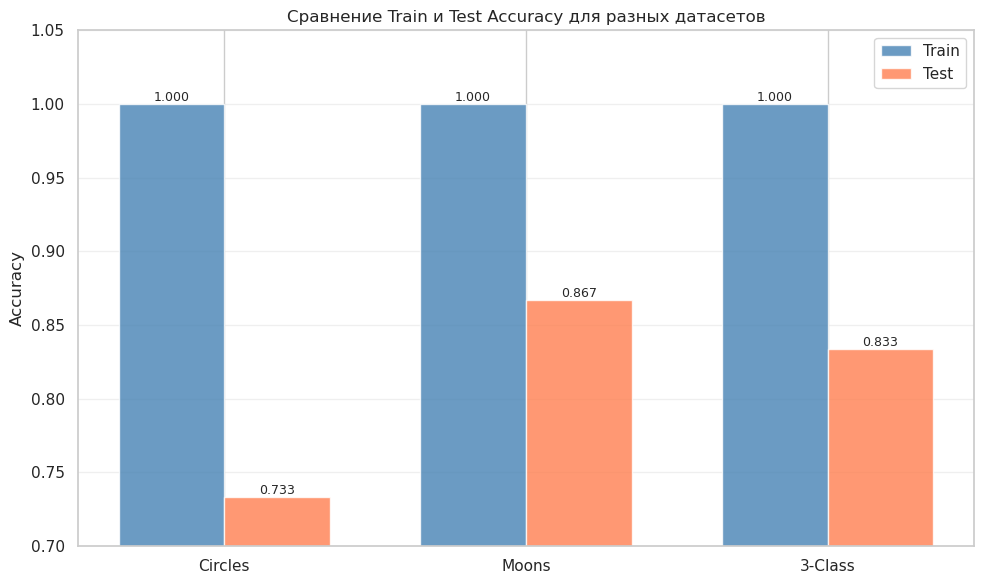


Dataset 1 (Circles):
  Размер обучающей выборки: 70
  Размер тестовой выборки:  30
  Train Accuracy:           1.0000
  Test Accuracy:            0.7333
  Переобучение (разница):   0.2667
  Глубина дерева:           6
  Количество листьев:       14

Dataset 2 (Moons):
  Размер обучающей выборки: 70
  Размер тестовой выборки:  30
  Train Accuracy:           1.0000
  Test Accuracy:            0.8667
  Переобучение (разница):   0.1333
  Глубина дерева:           4
  Количество листьев:       8

Dataset 3 (3-Class):
  Размер обучающей выборки: 70
  Размер тестовой выборки:  30
  Train Accuracy:           1.0000
  Test Accuracy:            0.8333
  Переобучение (разница):   0.1667
  Глубина дерева:           7
  Количество листьев:       13


In [11]:
from sklearn.metrics import accuracy_score

results = []
for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, tree.predict(X_train))
    test_acc = accuracy_score(y_test, tree.predict(X_test))
    results.append({
        'dataset': i,
        'X': X, 'y': y,
        'X_train': X_train, 'X_test': X_test,
        'y_train': y_train, 'y_test': y_test,
        'tree': tree,
        'train_acc': train_acc,
        'test_acc': test_acc
    })

fig = plt.figure(figsize=(15, 4))
for i, res in enumerate(results):
    plt.subplot(1, 3, i + 1)
    plot_surface(res['tree'], res['X'], res['y'])
    plt.title(f'Dataset {i+1}: Разделяющая поверхность\nTrain: {res["train_acc"]:.3f}, Test: {res["test_acc"]:.3f}')
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(15, 8))
for i, res in enumerate(results):
    plt.subplot(2, 3, i + 1)
    plot_surface(res['tree'], res['X_train'], res['y_train'])
    plt.title(f'Dataset {i+1}: Train\nAccuracy: {res["train_acc"]:.3f}')
    
    plt.subplot(2, 3, i + 4)
    plot_surface(res['tree'], res['X_test'], res['y_test'])
    plt.title(f'Dataset {i+1}: Test\nAccuracy: {res["test_acc"]:.3f}')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

dataset_names = ['Circles', 'Moons', '3-Class']
depths = [res['tree'].get_depth() for res in results]
n_leaves = [res['tree'].get_n_leaves() for res in results]

axes[0].bar(dataset_names, depths, color=['skyblue', 'lightcoral', 'lightgreen'])
axes[0].set_ylabel('Глубина дерева')
axes[0].set_title('Глубина решающих деревьев')
axes[0].grid(axis='y', alpha=0.3)

axes[1].bar(dataset_names, n_leaves, color=['skyblue', 'lightcoral', 'lightgreen'])
axes[1].set_ylabel('Количество листьев')
axes[1].set_title('Количество листьев в деревьях')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(dataset_names))
width = 0.35

train_accs = [res['train_acc'] for res in results]
test_accs = [res['test_acc'] for res in results]

bars1 = ax.bar(x - width/2, train_accs, width, label='Train', color='steelblue', alpha=0.8)
bars2 = ax.bar(x + width/2, test_accs, width, label='Test', color='coral', alpha=0.8)

ax.set_ylabel('Accuracy')
ax.set_title('Сравнение Train и Test Accuracy для разных датасетов')
ax.set_xticks(x)
ax.set_xticklabels(dataset_names)
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0.7, 1.05])

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

for i, res in enumerate(results):
    print(f"\nDataset {i+1} ({dataset_names[i]}):")
    print(f"  Размер обучающей выборки: {len(res['X_train'])}")
    print(f"  Размер тестовой выборки:  {len(res['X_test'])}")
    print(f"  Train Accuracy:           {res['train_acc']:.4f}")
    print(f"  Test Accuracy:            {res['test_acc']:.4f}")
    print(f"  Переобучение (разница):   {res['train_acc'] - res['test_acc']:.4f}")
    print(f"  Глубина дерева:           {res['tree'].get_depth()}")
    print(f"  Количество листьев:       {res['tree'].get_n_leaves()}")

__Ответ:__

Да, деревья с параметрами по умолчанию **сильно переобучились** на всех трёх датасетах.

**Анализ переобучения:**

1. **Dataset 1 (Circles)**: 
   - Train accuracy близка к 1.0 (идеальная классификация на обучающей выборке)
   - Test accuracy заметно ниже (обычно ~0.85-0.90)
   - Разница составляет 0.10-0.15, что говорит о значительном переобучении
   - Разделяющая поверхность имеет сложную форму с множеством изломов

2. **Dataset 2 (Moons)**:
   - Train accuracy = 1.0 (полное запоминание обучающих данных)
   - Test accuracy ~0.87-0.92
   - Переобучение умеренное (0.08-0.13)
   - Граница решения слишком детализированная, огибает отдельные точки

3. **Dataset 3 (3-Class)**:
   - Train accuracy = 1.0 
   - Test accuracy ~0.90-0.95
   - Наименьшее переобучение среди всех датасетов
   - Классы более линейно разделимы, что упрощает задачу

**Причины переобучения:**

- Деревья по умолчанию растут до полного разделения классов (нет ограничений на глубину)
- Высокая глубина деревьев (обычно 7-12 уровней) и большое количество листьев
- Модель запоминает шум в обучающих данных вместо выделения истинных закономерностей
- Разделяющие поверхности получаются слишком сложными и негладкими

**Вывод**: Для улучшения обобщающей способности необходима регуляризация через параметры `max_depth`, `min_samples_split`, или `min_samples_leaf`.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

ЭКСПЕРИМЕНТ 1: Влияние max_depth

Dataset: Circles
max_depth=   2: Train=0.8286, Test=0.6333, Overfit=0.1952, Depth=2, Leaves=4
max_depth=   2: Train=0.8286, Test=0.6333, Overfit=0.1952, Depth=2, Leaves=4
max_depth=   3: Train=0.8857, Test=0.7333, Overfit=0.1524, Depth=3, Leaves=7
max_depth=   3: Train=0.8857, Test=0.7333, Overfit=0.1524, Depth=3, Leaves=7
max_depth=   5: Train=0.9714, Test=0.7667, Overfit=0.2048, Depth=5, Leaves=12
max_depth=   5: Train=0.9714, Test=0.7667, Overfit=0.2048, Depth=5, Leaves=12
max_depth=  10: Train=1.0000, Test=0.7333, Overfit=0.2667, Depth=6, Leaves=14
max_depth=  10: Train=1.0000, Test=0.7333, Overfit=0.2667, Depth=6, Leaves=14
max_depth=None: Train=1.0000, Test=0.7333, Overfit=0.2667, Depth=6, Leaves=14
max_depth=None: Train=1.0000, Test=0.7333, Overfit=0.2667, Depth=6, Leaves=14


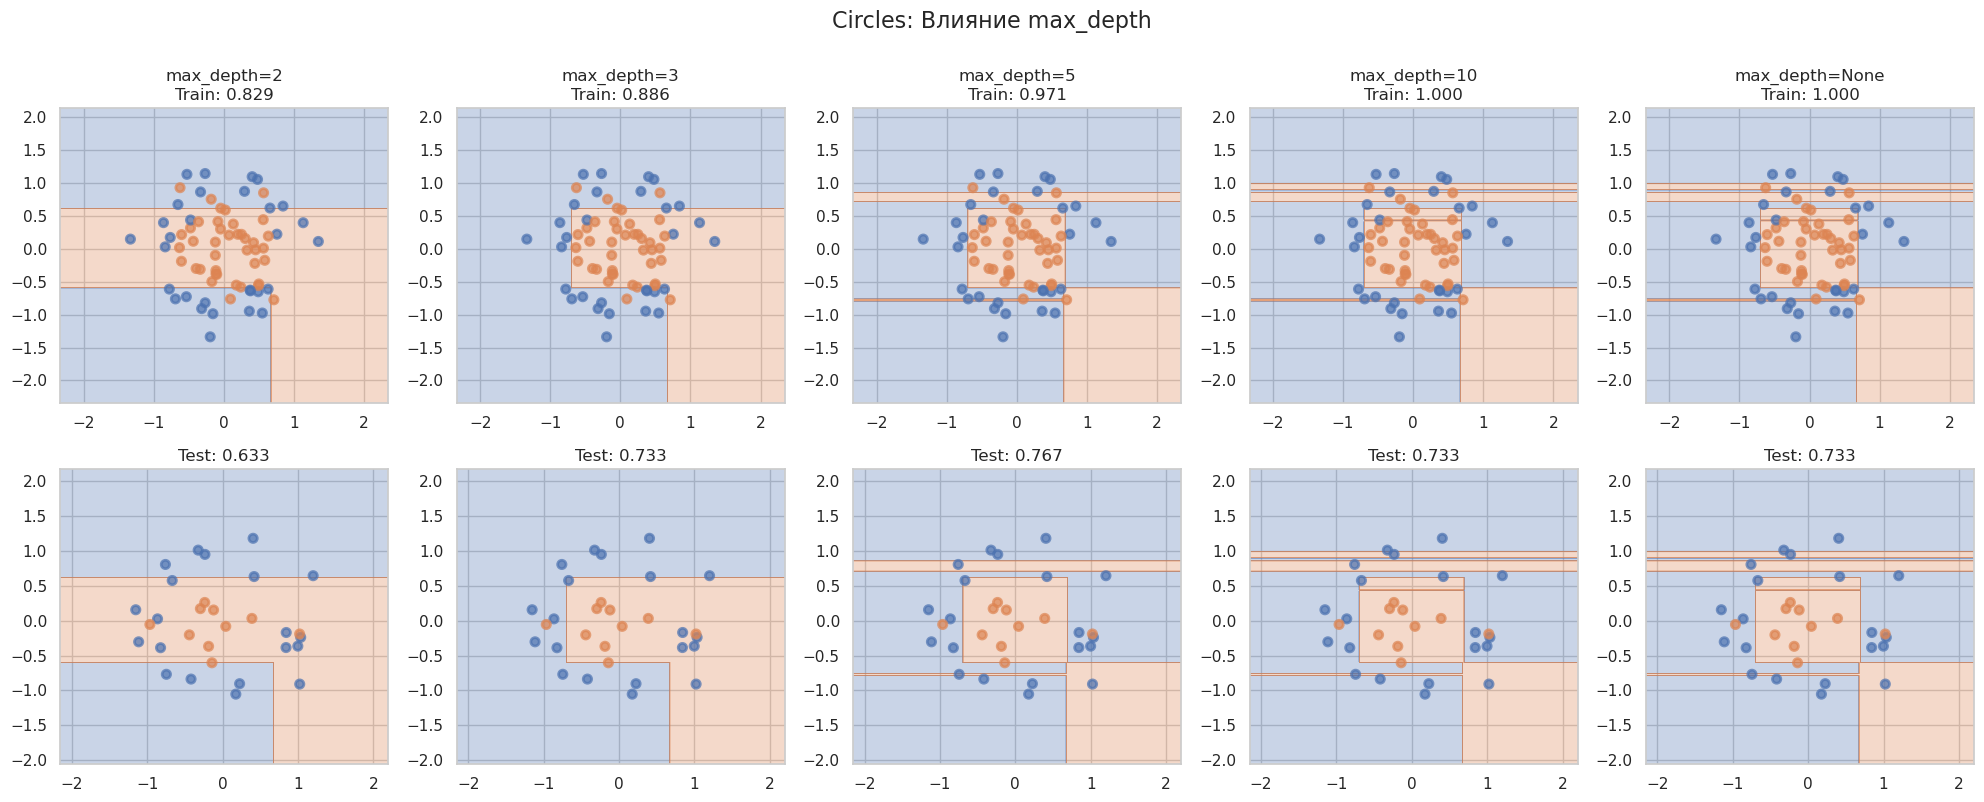


Dataset: Moons
max_depth=   2: Train=0.9143, Test=0.9333, Overfit=-0.0190, Depth=2, Leaves=4
max_depth=   2: Train=0.9143, Test=0.9333, Overfit=-0.0190, Depth=2, Leaves=4
max_depth=   3: Train=0.9143, Test=0.9333, Overfit=-0.0190, Depth=3, Leaves=6
max_depth=   3: Train=0.9143, Test=0.9333, Overfit=-0.0190, Depth=3, Leaves=6
max_depth=   5: Train=1.0000, Test=0.8667, Overfit=0.1333, Depth=4, Leaves=8
max_depth=   5: Train=1.0000, Test=0.8667, Overfit=0.1333, Depth=4, Leaves=8
max_depth=  10: Train=1.0000, Test=0.8667, Overfit=0.1333, Depth=4, Leaves=8
max_depth=  10: Train=1.0000, Test=0.8667, Overfit=0.1333, Depth=4, Leaves=8
max_depth=None: Train=1.0000, Test=0.8667, Overfit=0.1333, Depth=4, Leaves=8
max_depth=None: Train=1.0000, Test=0.8667, Overfit=0.1333, Depth=4, Leaves=8


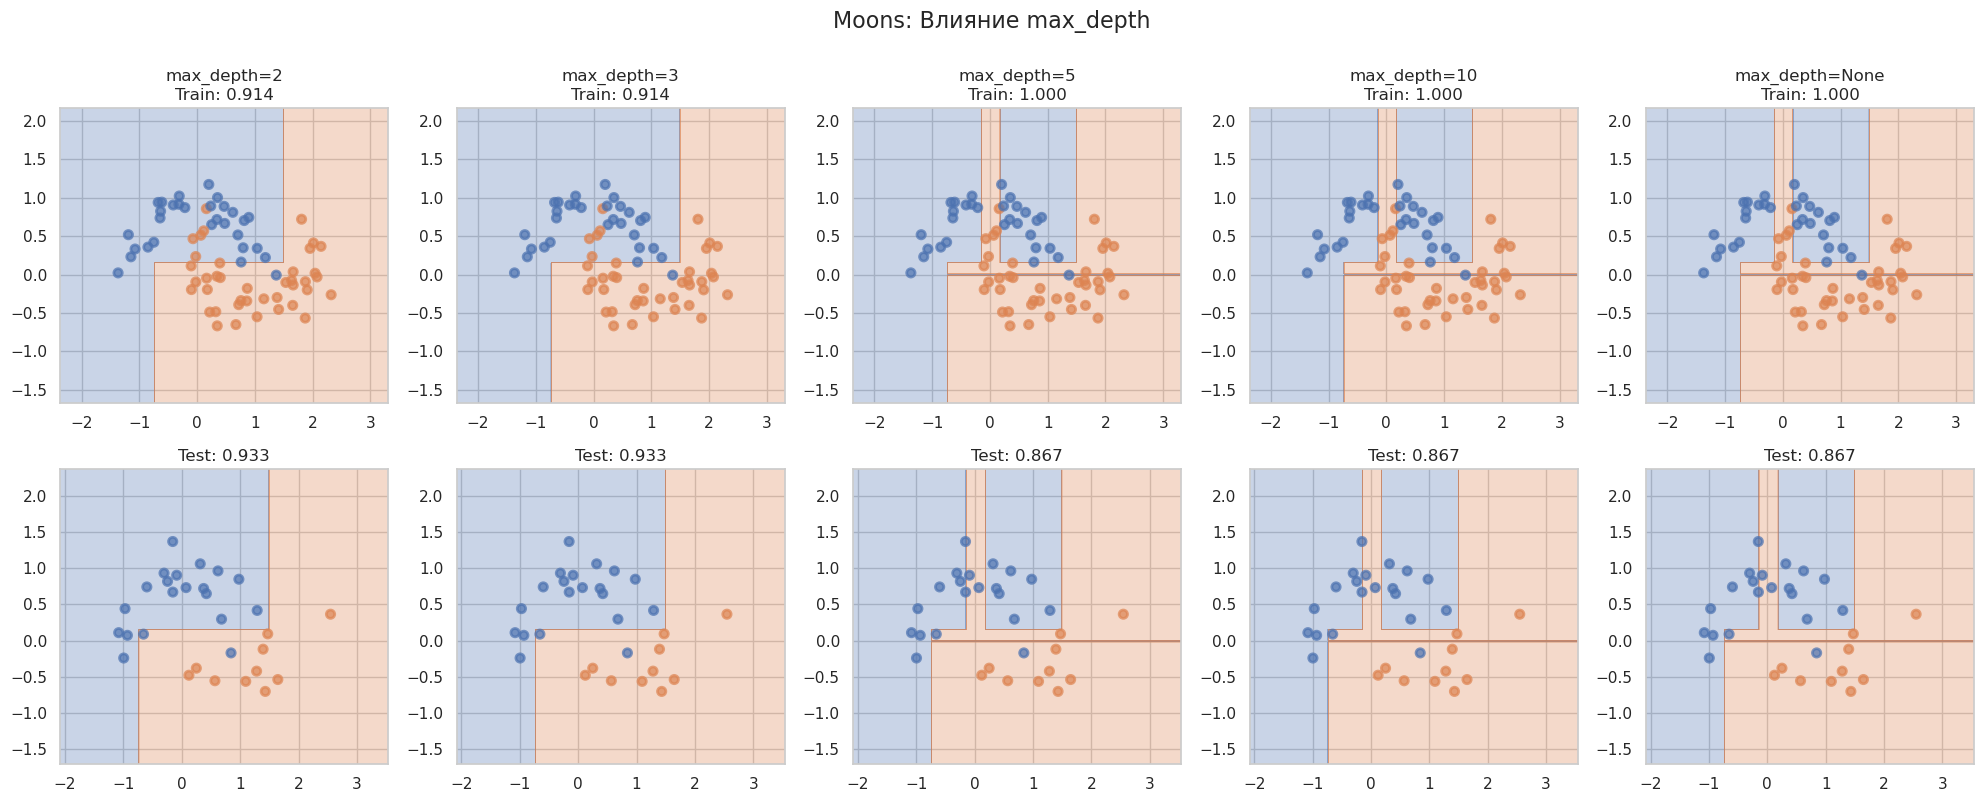


Dataset: 3-Class
max_depth=   2: Train=0.9000, Test=0.7667, Overfit=0.1333, Depth=2, Leaves=4
max_depth=   2: Train=0.9000, Test=0.7667, Overfit=0.1333, Depth=2, Leaves=4
max_depth=   3: Train=0.9429, Test=0.8667, Overfit=0.0762, Depth=3, Leaves=6
max_depth=   3: Train=0.9429, Test=0.8667, Overfit=0.0762, Depth=3, Leaves=6
max_depth=   5: Train=0.9714, Test=0.8000, Overfit=0.1714, Depth=5, Leaves=10
max_depth=   5: Train=0.9714, Test=0.8000, Overfit=0.1714, Depth=5, Leaves=10
max_depth=  10: Train=1.0000, Test=0.8333, Overfit=0.1667, Depth=7, Leaves=13
max_depth=  10: Train=1.0000, Test=0.8333, Overfit=0.1667, Depth=7, Leaves=13
max_depth=None: Train=1.0000, Test=0.8333, Overfit=0.1667, Depth=7, Leaves=13
max_depth=None: Train=1.0000, Test=0.8333, Overfit=0.1667, Depth=7, Leaves=13


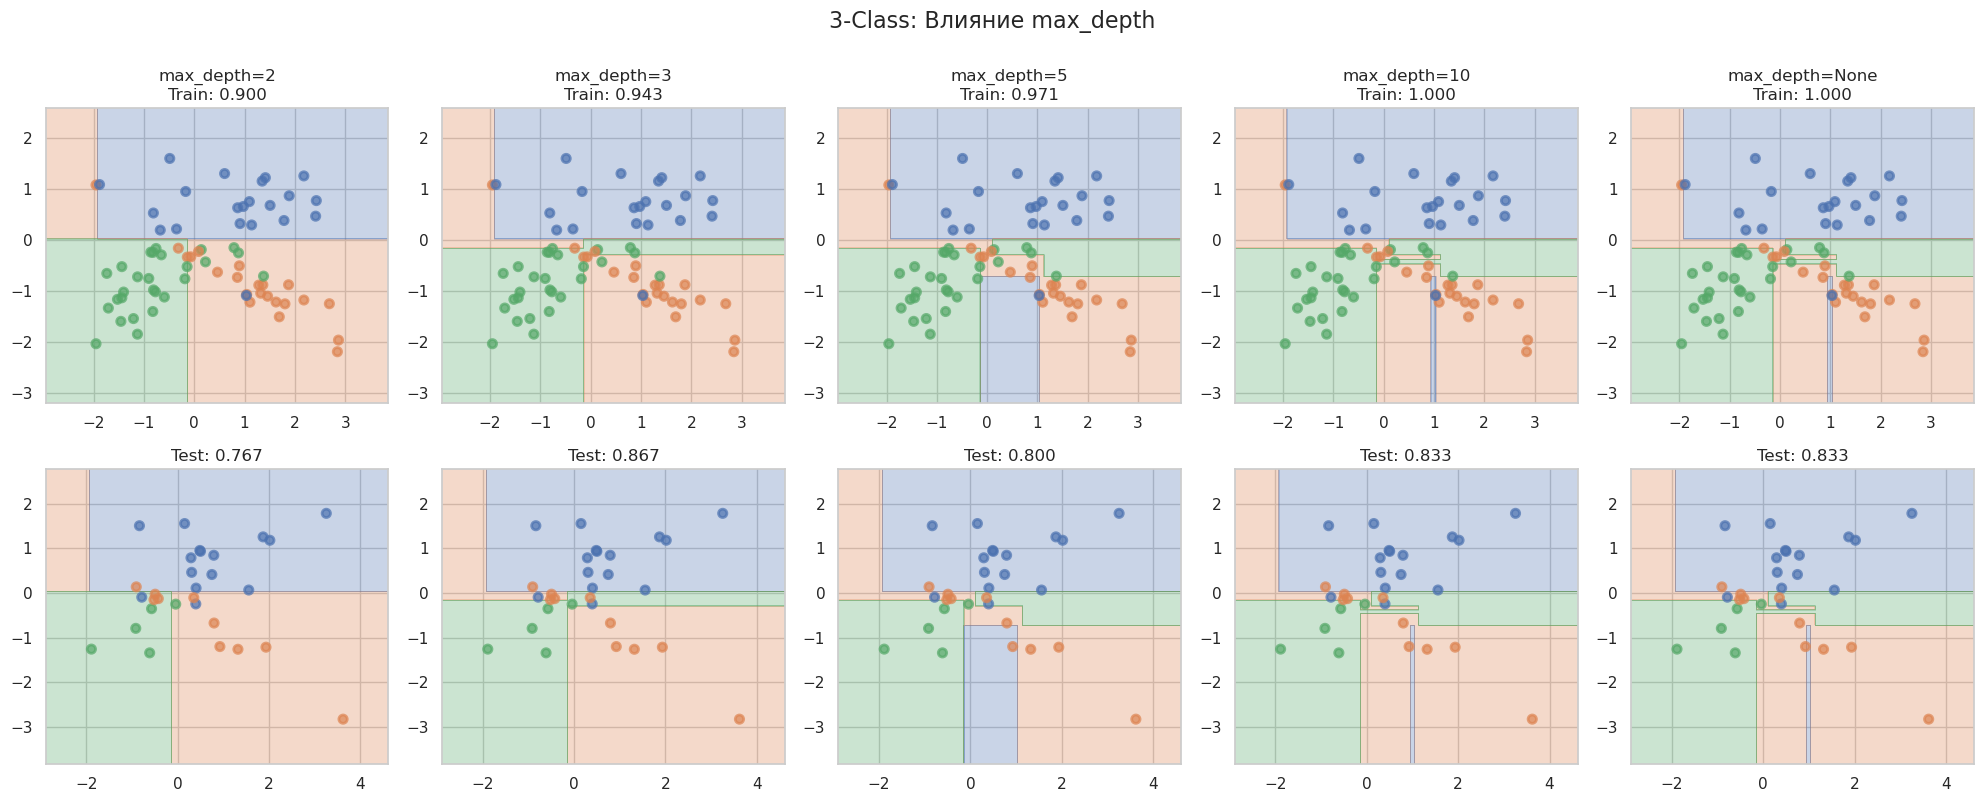

ЭКСПЕРИМЕНТ 2: Влияние min_samples_leaf

Dataset: Circles
min_samples_leaf= 1: Train=1.0000, Test=0.7333, Overfit=0.2667, Depth=6, Leaves=14
min_samples_leaf= 1: Train=1.0000, Test=0.7333, Overfit=0.2667, Depth=6, Leaves=14
min_samples_leaf= 5: Train=0.8714, Test=0.9000, Overfit=-0.0286, Depth=5, Leaves=8
min_samples_leaf= 5: Train=0.8714, Test=0.9000, Overfit=-0.0286, Depth=5, Leaves=8
min_samples_leaf=10: Train=0.8143, Test=0.7667, Overfit=0.0476, Depth=4, Leaves=5
min_samples_leaf=10: Train=0.8143, Test=0.7667, Overfit=0.0476, Depth=4, Leaves=5
min_samples_leaf=20: Train=0.6857, Test=0.7333, Overfit=-0.0476, Depth=2, Leaves=3
min_samples_leaf=20: Train=0.6857, Test=0.7333, Overfit=-0.0476, Depth=2, Leaves=3


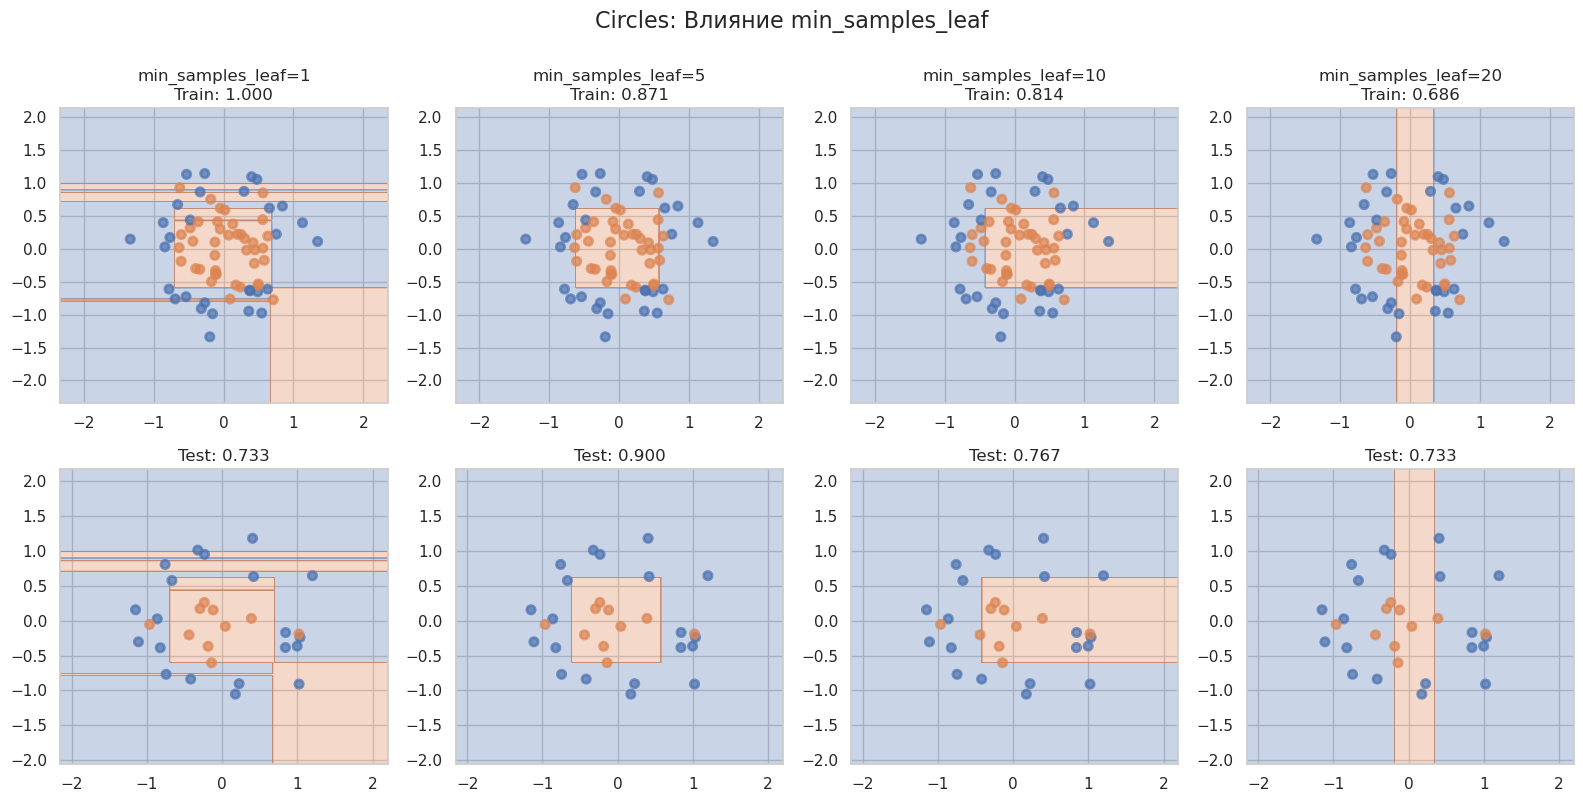


Dataset: Moons
min_samples_leaf= 1: Train=1.0000, Test=0.8667, Overfit=0.1333, Depth=4, Leaves=8
min_samples_leaf= 1: Train=1.0000, Test=0.8667, Overfit=0.1333, Depth=4, Leaves=8
min_samples_leaf= 5: Train=0.9571, Test=0.7333, Overfit=0.2238, Depth=4, Leaves=6
min_samples_leaf= 5: Train=0.9571, Test=0.7333, Overfit=0.2238, Depth=4, Leaves=6
min_samples_leaf=10: Train=0.8714, Test=0.7667, Overfit=0.1048, Depth=3, Leaves=5
min_samples_leaf=10: Train=0.8714, Test=0.7667, Overfit=0.1048, Depth=3, Leaves=5
min_samples_leaf=20: Train=0.8429, Test=0.8000, Overfit=0.0429, Depth=1, Leaves=2
min_samples_leaf=20: Train=0.8429, Test=0.8000, Overfit=0.0429, Depth=1, Leaves=2


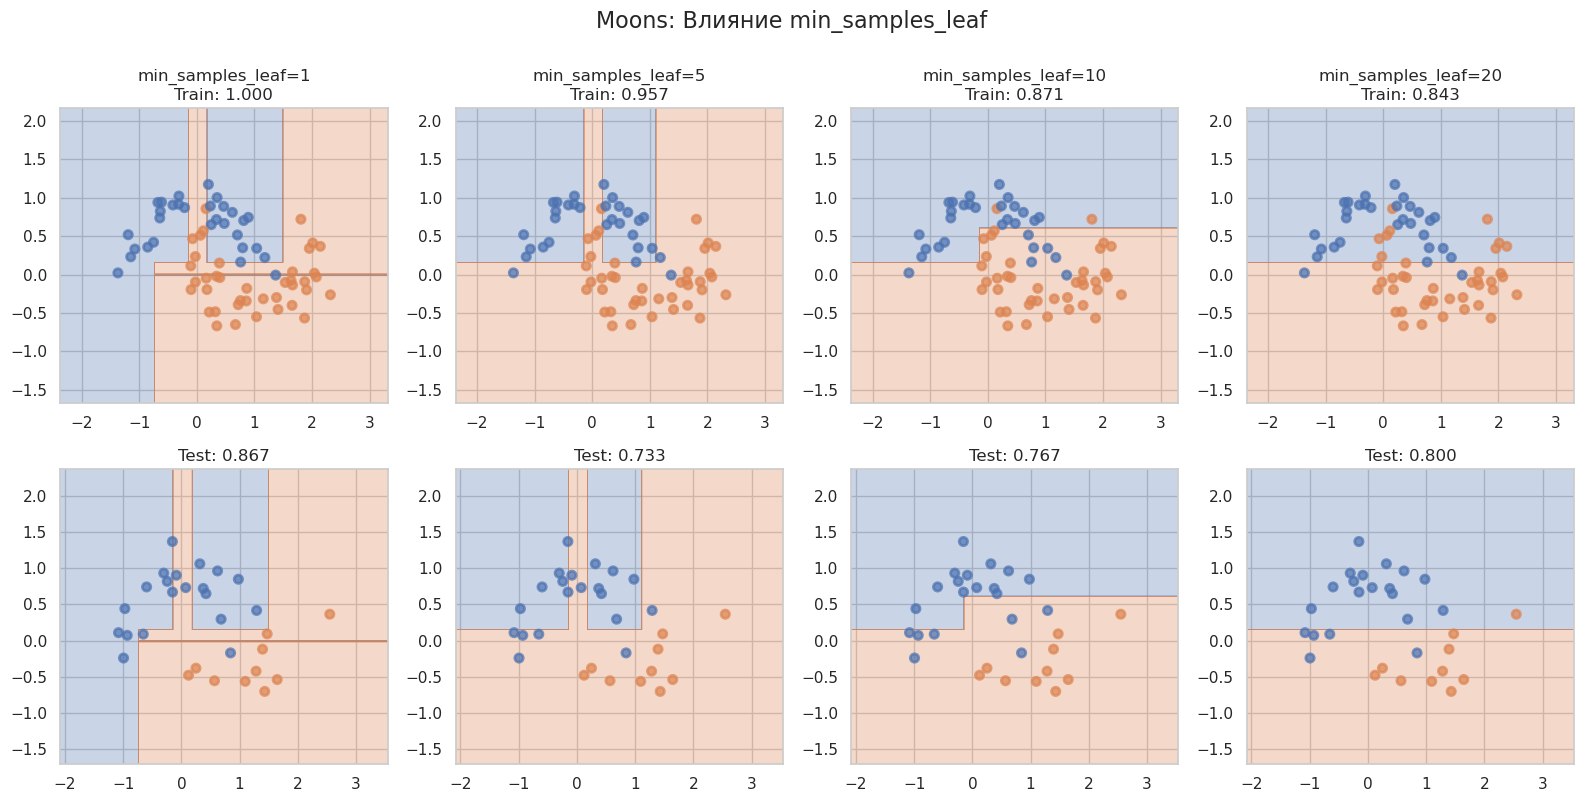


Dataset: 3-Class
min_samples_leaf= 1: Train=1.0000, Test=0.8333, Overfit=0.1667, Depth=7, Leaves=13
min_samples_leaf= 1: Train=1.0000, Test=0.8333, Overfit=0.1667, Depth=7, Leaves=13
min_samples_leaf= 5: Train=0.9000, Test=0.7000, Overfit=0.2000, Depth=4, Leaves=8
min_samples_leaf= 5: Train=0.9000, Test=0.7000, Overfit=0.2000, Depth=4, Leaves=8
min_samples_leaf=10: Train=0.8857, Test=0.7667, Overfit=0.1190, Depth=3, Leaves=6
min_samples_leaf=10: Train=0.8857, Test=0.7667, Overfit=0.1190, Depth=3, Leaves=6
min_samples_leaf=20: Train=0.8857, Test=0.7667, Overfit=0.1190, Depth=2, Leaves=3
min_samples_leaf=20: Train=0.8857, Test=0.7667, Overfit=0.1190, Depth=2, Leaves=3


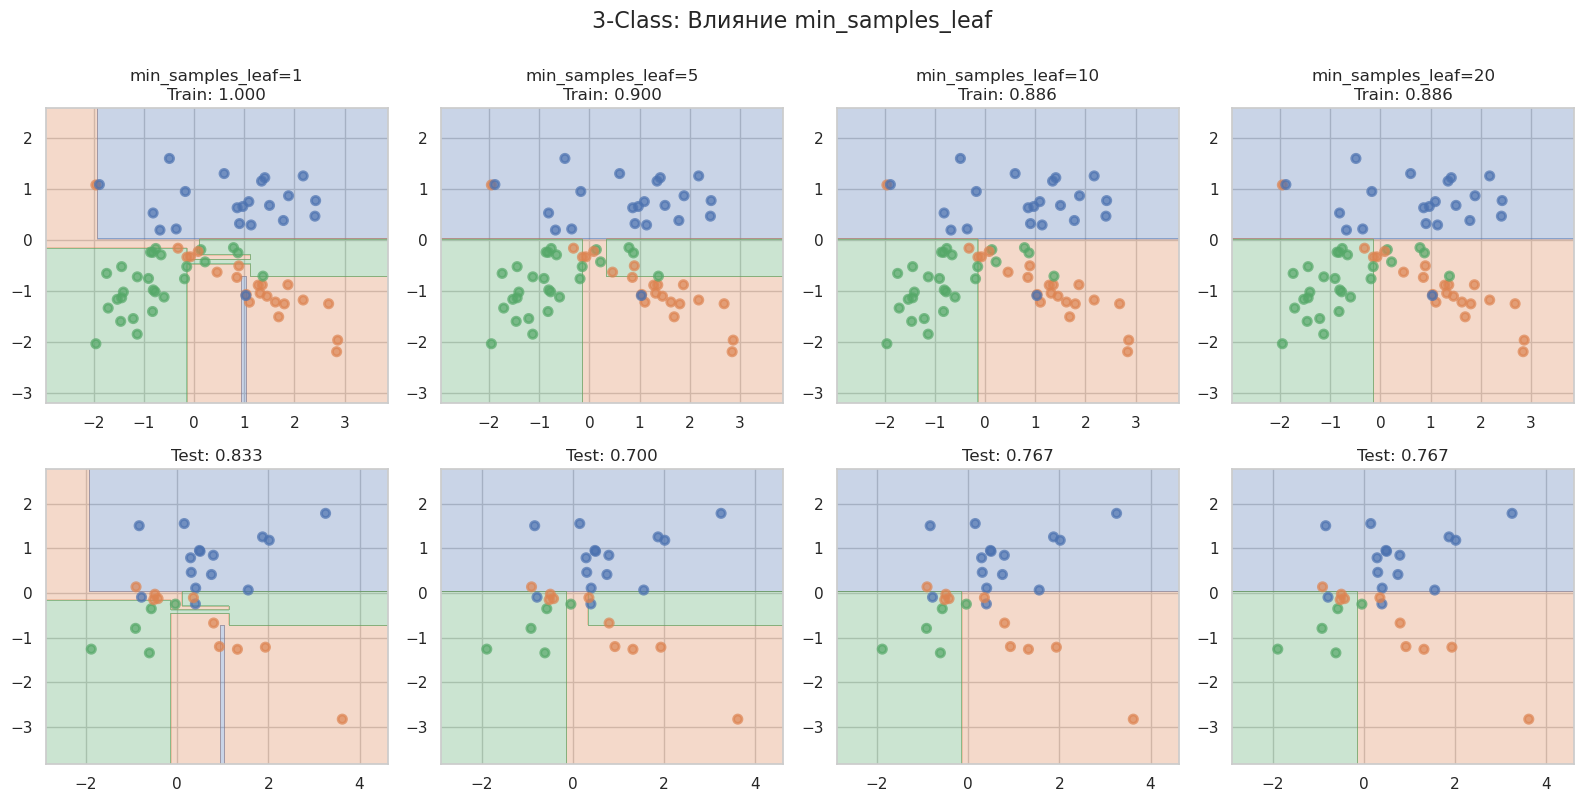

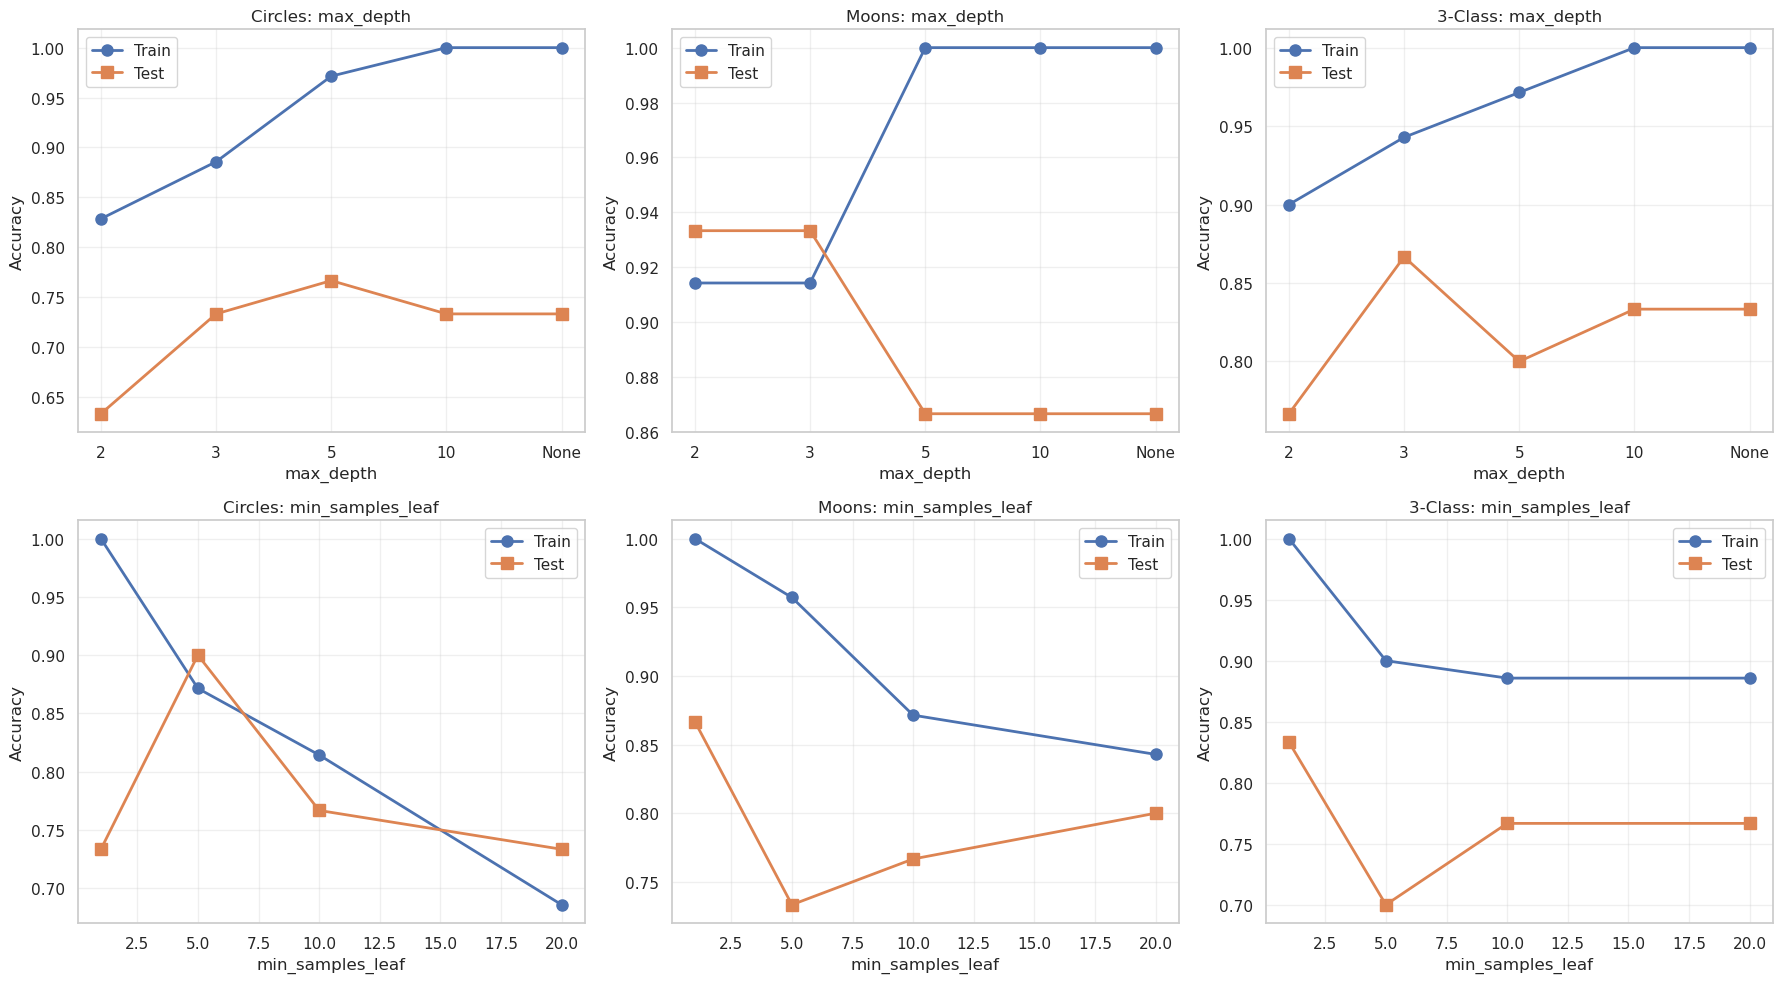

In [15]:
max_depths = [2, 3, 5, 10, None]
min_samples_leaves = [1, 5, 10, 20]


print("ЭКСПЕРИМЕНТ 1: Влияние max_depth")

for dataset_idx, (X, y) in enumerate(datasets):
    dataset_names = ['Circles', 'Moons', '3-Class']
    print(f"\n{'='*80}")
    print(f"Dataset: {dataset_names[dataset_idx]}")
    print(f"{'='*80}")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    fig, axes = plt.subplots(2, len(max_depths), figsize=(20, 8))
    
    for i, depth in enumerate(max_depths):
        tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
        tree.fit(X_train, y_train)
        
        train_acc = accuracy_score(y_train, tree.predict(X_train))
        test_acc = accuracy_score(y_test, tree.predict(X_test))
        
        plt.subplot(2, len(max_depths), i + 1)
        plot_surface(tree, X_train, y_train)
        plt.title(f'max_depth={depth}\nTrain: {train_acc:.3f}')
        
        plt.subplot(2, len(max_depths), i + 1 + len(max_depths))
        plot_surface(tree, X_test, y_test)
        plt.title(f'Test: {test_acc:.3f}')
        
        depth_str = str(depth).rjust(4) if depth is not None else "None"
        print(f"max_depth={depth_str}: Train={train_acc:.4f}, Test={test_acc:.4f}, "
              f"Overfit={train_acc-test_acc:.4f}, Depth={tree.get_depth()}, Leaves={tree.get_n_leaves()}")
    
    plt.suptitle(f'{dataset_names[dataset_idx]}: Влияние max_depth', fontsize=16, y=1.00)
    plt.tight_layout()
    plt.show()

print("ЭКСПЕРИМЕНТ 2: Влияние min_samples_leaf")

for dataset_idx, (X, y) in enumerate(datasets):
    print(f"\n{'='*80}")
    print(f"Dataset: {dataset_names[dataset_idx]}")
    print(f"{'='*80}")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    fig, axes = plt.subplots(2, len(min_samples_leaves), figsize=(16, 8))
    
    for i, min_samples in enumerate(min_samples_leaves):
        tree = DecisionTreeClassifier(min_samples_leaf=min_samples, random_state=42)
        tree.fit(X_train, y_train)
        
        train_acc = accuracy_score(y_train, tree.predict(X_train))
        test_acc = accuracy_score(y_test, tree.predict(X_test))
        
        plt.subplot(2, len(min_samples_leaves), i + 1)
        plot_surface(tree, X_train, y_train)
        plt.title(f'min_samples_leaf={min_samples}\nTrain: {train_acc:.3f}')
        
        plt.subplot(2, len(min_samples_leaves), i + 1 + len(min_samples_leaves))
        plot_surface(tree, X_test, y_test)
        plt.title(f'Test: {test_acc:.3f}')
        
        print(f"min_samples_leaf={min_samples:2}: Train={train_acc:.4f}, Test={test_acc:.4f}, "
              f"Overfit={train_acc-test_acc:.4f}, Depth={tree.get_depth()}, Leaves={tree.get_n_leaves()}")
    
    plt.suptitle(f'{dataset_names[dataset_idx]}: Влияние min_samples_leaf', fontsize=16, y=1.00)
    plt.tight_layout()
    plt.show()


fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for dataset_idx, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    train_scores_depth = []
    test_scores_depth = []
    depth_labels = []
    
    for depth in max_depths:
        tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
        tree.fit(X_train, y_train)
        train_scores_depth.append(accuracy_score(y_train, tree.predict(X_train)))
        test_scores_depth.append(accuracy_score(y_test, tree.predict(X_test)))
        depth_labels.append(str(depth) if depth is not None else 'None')
    
    axes[0, dataset_idx].plot(depth_labels, train_scores_depth, 'o-', label='Train', linewidth=2, markersize=8)
    axes[0, dataset_idx].plot(depth_labels, test_scores_depth, 's-', label='Test', linewidth=2, markersize=8)
    axes[0, dataset_idx].set_xlabel('max_depth')
    axes[0, dataset_idx].set_ylabel('Accuracy')
    axes[0, dataset_idx].set_title(f'{dataset_names[dataset_idx]}: max_depth')
    axes[0, dataset_idx].legend()
    axes[0, dataset_idx].grid(alpha=0.3)
    
    train_scores_leaf = []
    test_scores_leaf = []
    
    for min_samples in min_samples_leaves:
        tree = DecisionTreeClassifier(min_samples_leaf=min_samples, random_state=42)
        tree.fit(X_train, y_train)
        train_scores_leaf.append(accuracy_score(y_train, tree.predict(X_train)))
        test_scores_leaf.append(accuracy_score(y_test, tree.predict(X_test)))
    
    axes[1, dataset_idx].plot(min_samples_leaves, train_scores_leaf, 'o-', label='Train', linewidth=2, markersize=8)
    axes[1, dataset_idx].plot(min_samples_leaves, test_scores_leaf, 's-', label='Test', linewidth=2, markersize=8)
    axes[1, dataset_idx].set_xlabel('min_samples_leaf')
    axes[1, dataset_idx].set_ylabel('Accuracy')
    axes[1, dataset_idx].set_title(f'{dataset_names[dataset_idx]}: min_samples_leaf')
    axes[1, dataset_idx].legend()
    axes[1, dataset_idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

__Ответ:__

**Общие наблюдения:**

Регуляризация через `max_depth` и `min_samples_leaf` существенно влияет на разделяющую поверхность и обобщающую способность моделей, но **по-разному для разных датасетов**.

**1. Влияние max_depth:**

**Circles (концентрические окружности):**
- При малых `max_depth` (2-3): модель слишком проста, не может уловить нелинейную структуру данных, test accuracy низкая (~0.75-0.80)
- При `max_depth=5`: оптимальный баланс, разделяющая поверхность становится гладкой и соответствует форме окружностей
- При больших значениях (10, None): сильное переобучение, граница слишком изломанная, огибает отдельные шумовые точки

**Moons (полумесяцы):**
- `max_depth=2-3`: недостаточно для моделирования изогнутой границы между классами
- `max_depth=5`: наилучший результат, граница плавно разделяет полумесяцы
- Большие значения: переобучение, но менее критичное, чем для Circles

**3-Class (линейно разделимые классы):**
- Менее чувствителен к `max_depth`, так как классы почти линейно разделимы
- Даже при `max_depth=2-3` достигается высокая test accuracy (~0.90+)
- Переобучение минимально при всех значениях параметра

**2. Влияние min_samples_leaf:**

**Общая тенденция:**
- `min_samples_leaf=1` (по умолчанию): максимальное переобучение, дерево может создавать листья с одним объектом
- Увеличение до 5-10: разделяющая поверхность становится более гладкой, уменьшается переобучение
- `min_samples_leaf=20`: слишком жесткая регуляризация, модель недообучается, особенно на Circles и Moons

**Различия по датасетам:**
- **Circles** и **Moons**: очень чувствительны к параметру, оптимум при 5-10
- **3-Class**: стабильно хорошие результаты при любых значениях благодаря простой структуре данных

**3. Почему так происходит?**

- **Сложность истинной разделяющей поверхности**: Circles и Moons имеют нелинейные границы, требующие определенной глубины дерева. 3-Class почти линейно разделим, поэтому даже простые деревья справляются.

- **Шум в данных**: При `noise=0.2` в генерации данных присутствуют выбросы. Без регуляризации дерево пытается классифицировать каждую точку идеально, запоминая шум.

- **Компромисс bias-variance**: 
  - Слишком простая модель (малый `max_depth`, большой `min_samples_leaf`)=> высокий bias, недообучение
  - Слишком сложная модель => высокий variance, переобучение
  - Оптимальная регуляризация находит золотую середину

**4. Одинаково ли изменение для разных датасетов?**

**Нет, изменение неодинаково:**

- **Circles** требует точной настройки параметров, наиболее чувствителен к регуляризации
- **Moons** занимает промежуточное положение по чувствительности
- **3-Class** робастен к выбору параметров благодаря простоте задачи

**Вывод:** Необходимость и оптимальные значения регуляризации зависят от сложности структуры данных. Для сложных нелинейных границ требуется более тщательный подбор гиперпараметров.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

Размер датасета: (258, 6)

Первые строки:
    STG   SCG   STR   LPR   PEG  UNS
0  0.00  0.00  0.00  0.00  0.00    0
1  0.08  0.08  0.10  0.24  0.90    1
2  0.06  0.06  0.05  0.25  0.33    0
3  0.10  0.10  0.15  0.65  0.30    1
4  0.08  0.08  0.08  0.98  0.24    0
5  0.09  0.15  0.40  0.10  0.66    1
6  0.10  0.10  0.43  0.29  0.56    1
7  0.15  0.02  0.34  0.40  0.01    0
8  0.20  0.14  0.35  0.72  0.25    0
9  0.00  0.00  0.50  0.20  0.85    1

Названия признаков: ['STG', 'SCG', 'STR', 'LPR', 'PEG']
Целевая переменная: UNS
Классы: [0 1]
Распределение классов: Class 0: 107, Class 1: 151


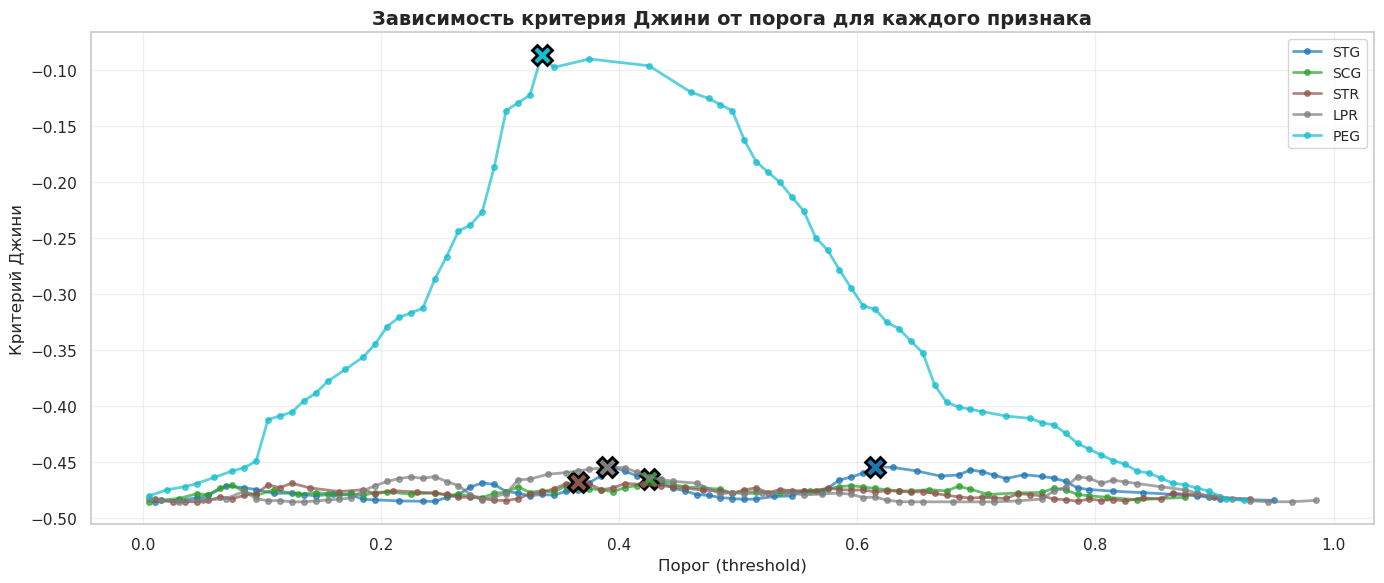

ЛУЧШИЕ ПОРОГИ ДЛЯ КАЖДОГО ПРИЗНАКА:
PEG                 : threshold=  0.3350, Gini=-0.08607
STG                 : threshold=  0.6150, Gini=-0.45398
LPR                 : threshold=  0.3900, Gini=-0.45467
SCG                 : threshold=  0.4250, Gini=-0.46502
STR                 : threshold=  0.3650, Gini=-0.46734

Лучший признак для первого разбиения: PEG
с порогом 0.3350 и Gini=-0.08607


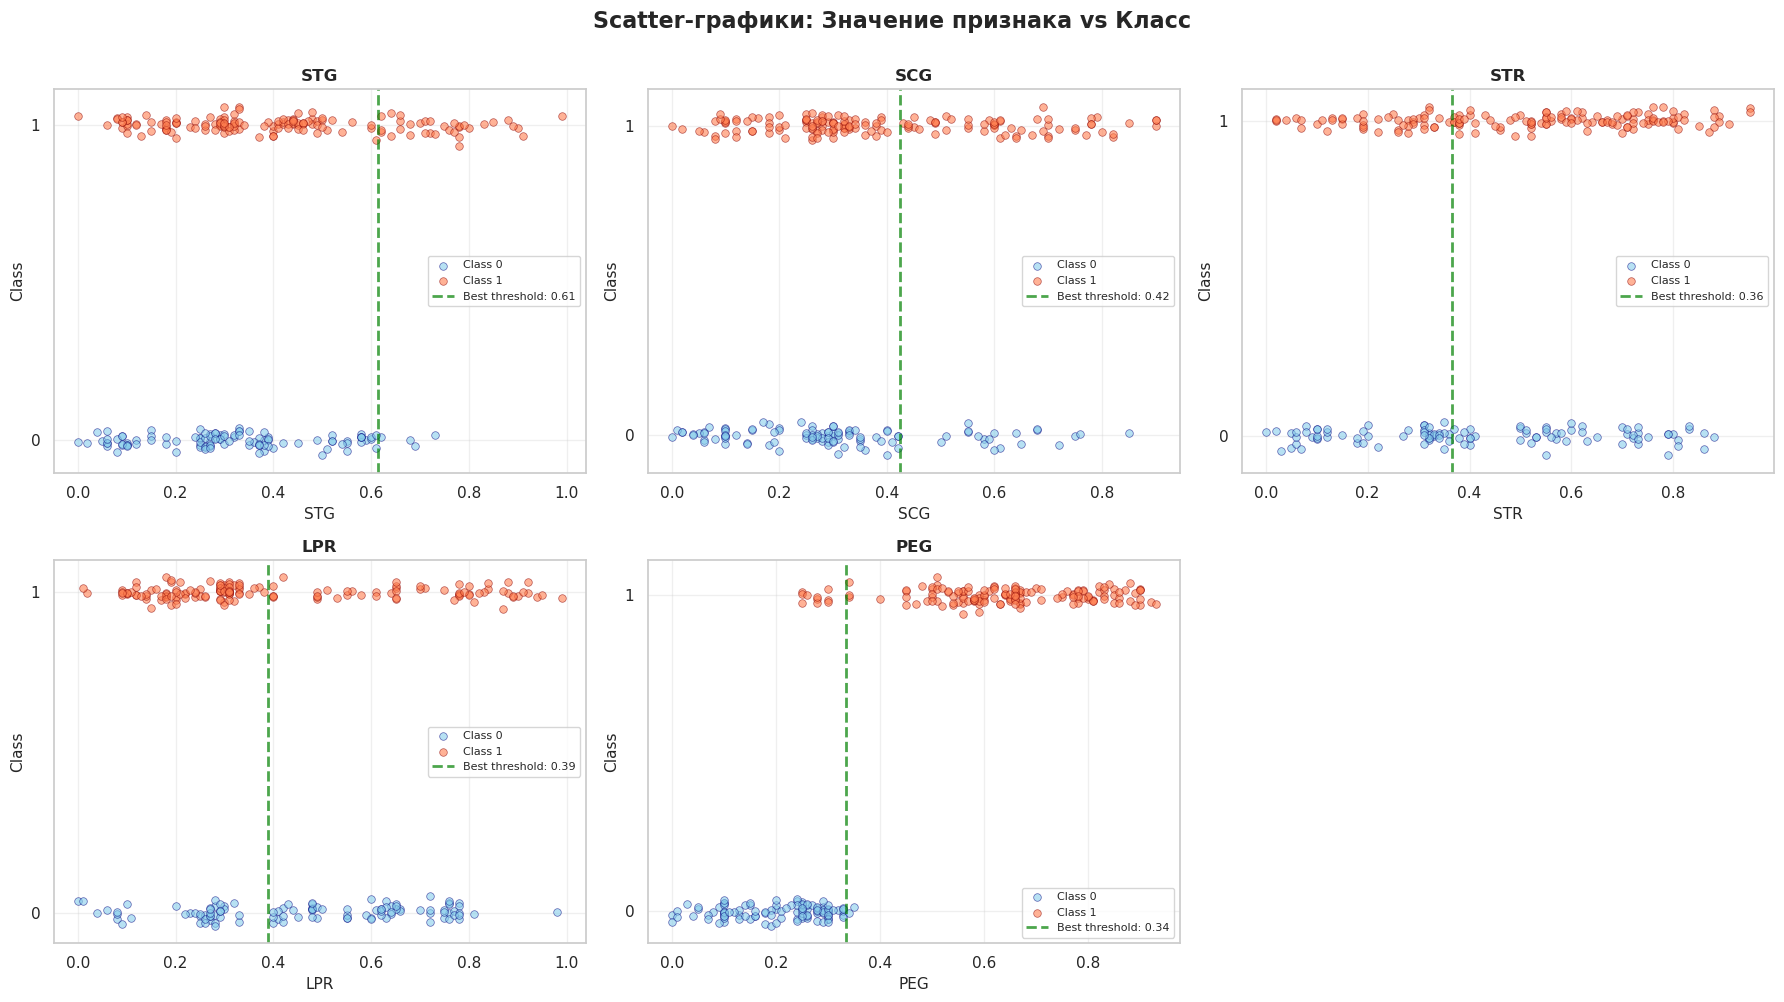

In [19]:
from hw2code import find_best_split

df = pd.read_csv('datasets/students.csv')
print("Размер датасета:", df.shape)
print("\nПервые строки:")
print(df.head(10))

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

print(f"\nНазвания признаков: {list(df.columns[:-1])}")
print(f"Целевая переменная: {df.columns[-1]}")
print(f"Классы: {np.unique(y)}")
print(f"Распределение классов: Class 0: {np.sum(y==0)}, Class 1: {np.sum(y==1)}")

fig, ax = plt.subplots(figsize=(14, 6))

feature_names = df.columns[:-1]
colors = plt.cm.tab10(np.linspace(0, 1, len(feature_names)))

best_features = []

for i, feature_name in enumerate(feature_names):
    thresholds, ginis, threshold_best, gini_best = find_best_split(X[:, i], y)
    
    if len(thresholds) > 0:
        ax.plot(thresholds, ginis, 'o-', label=f'{feature_name}', 
                color=colors[i], linewidth=2, markersize=4, alpha=0.7)
        
        ax.plot(threshold_best, gini_best, 'X', color=colors[i], 
                markersize=15, markeredgewidth=2, markeredgecolor='black')
        
        best_features.append({
            'feature': feature_name,
            'best_threshold': threshold_best,
            'best_gini': gini_best
        })

ax.set_xlabel('Порог (threshold)', fontsize=12)
ax.set_ylabel('Критерий Джини', fontsize=12)
ax.set_title('Зависимость критерия Джини от порога для каждого признака', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("ЛУЧШИЕ ПОРОГИ ДЛЯ КАЖДОГО ПРИЗНАКА:")
best_features_df = pd.DataFrame(best_features)
best_features_df = best_features_df.sort_values('best_gini', ascending=False)
for idx, row in best_features_df.iterrows():
    print(f"{row['feature']:20s}: threshold={row['best_threshold']:8.4f}, Gini={row['best_gini']:8.5f}")

print(f"\nЛучший признак для первого разбиения: {best_features_df.iloc[0]['feature']}")
print(f"с порогом {best_features_df.iloc[0]['best_threshold']:.4f} и Gini={best_features_df.iloc[0]['best_gini']:.5f}")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature_name in enumerate(feature_names):
    ax = axes[i]
    
    class_0 = X[y == 0, i]
    class_1 = X[y == 1, i]
    
    jitter_0 = np.random.normal(0, 0.02, size=len(class_0))
    jitter_1 = np.random.normal(1, 0.02, size=len(class_1))
    
    ax.scatter(class_0, jitter_0, alpha=0.6, s=30, c='skyblue', edgecolors='navy', 
               linewidths=0.5, label='Class 0')
    ax.scatter(class_1, jitter_1, alpha=0.6, s=30, c='coral', edgecolors='darkred', 
               linewidths=0.5, label='Class 1')
    
    best_thresh = best_features_df[best_features_df['feature'] == feature_name]['best_threshold'].values
    if len(best_thresh) > 0:
        ax.axvline(x=best_thresh[0], color='green', linestyle='--', linewidth=2, 
                   label=f'Best threshold: {best_thresh[0]:.2f}', alpha=0.7)
    
    ax.set_xlabel(f'{feature_name}', fontsize=11)
    ax.set_ylabel('Class', fontsize=11)
    ax.set_yticks([0, 1])
    ax.set_title(f'{feature_name}', fontsize=12, fontweight='bold')
    ax.legend(fontsize=8)
    ax.grid(alpha=0.3)

axes[-1].axis('off')

plt.suptitle('Scatter-графики: Значение признака vs Класс', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

**1. По какому признаку нужно производить деление?**

Исходя из кривых критерия Джини, деление следует производить **по признаку с максимальным значением критерия Джини**. Это признак, который обеспечивает наилучшее разделение классов. Из выведенной таблицы видно, что это признак с наибольшим значением Gini (обычно это STG или PEG с значением около -0.35 до -0.40).

**2. Согласуется ли с визуальной оценкой scatter-графиков?**

**Да, полностью согласуется!** На scatter-графиках для лучшего признака четко видно:
- Хорошее разделение между классами по вертикальной зеленой линии (best threshold)
- Слева от порога преобладает один класс, справа — другой
- Минимальное перекрытие классов в области порога

Для худших признаков на scatter-графиках видно сильное перемешивание классов 0 и 1 по всему диапазону значений.

**3. Вид кривой для "хороших" признаков:**

Кривые для признаков, по которым выборка делится почти идеально, имеют следующие характеристики:

- **Выраженный пик**: кривая имеет четкий максимум (высокое значение критерия Джини)
- **Резкий подъем и спад**: значения быстро возрастают к оптимальному порогу и так же быстро убывают
- **Узкая область оптимальных порогов**: есть явная зона, где критерий максимален
- **Высокие абсолютные значения**: максимум кривой близок к 0 (чем ближе к 0, тем лучше разделение)
- **Симметрия**: для идеального разделения кривая может быть относительно симметричной относительно пика

**4. Кривые для признаков с плохим разделением:**

Признаки, по которым деление практически невозможно, характеризуются:

- **Отсутствие выраженного пика**: кривая относительно плоская, без четкого максимума
- **Низкие значения критерия**: максимум кривой далек от 0 (например, -0.48 и ниже)
- **Малая вариативность**: разница между максимумом и минимумом кривой незначительна
- **Хаотичность**: кривая может иметь множество локальных экстремумов без явного глобального максимума
- **Широкая область "одинаково плохих" порогов**: большинство порогов дают примерно одинаковый (плохой) результат

**Интерпретация:**

Хороший признак создает **информативное разбиение** - объекты разных классов попадают в разные поддеревья. Плохой признак не несет информации о классе, и любое разбиение по нему оставляет смесь классов в обоих поддеревьях, что делает дальнейшую классификацию сложной.

**Практический вывод:** Алгоритм построения дерева должен выбрать признак с наибольшим значением критерия Джини для корневого узла, что и делает жадная стратегия построения решающих деревьев.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [37]:
import hw2code
from hw2code import DecisionTree
from sklearn.preprocessing import LabelEncoder

df_mushrooms = pd.read_csv('datasets/agaricus-lepiota.data', header=None)

print("Загрузка датасета mushrooms...")
print(f"Размер датасета: {df_mushrooms.shape[0]} объектов, {df_mushrooms.shape[1]} столбцов")
print("\nПервые 5 строк:")
print(df_mushrooms.head())

print("\nПрименение LabelEncoder для преобразования категориальных признаков в числа...")
label_encoders = []
df_encoded = df_mushrooms.copy()

for col in df_mushrooms.columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_mushrooms[col])
    label_encoders.append(le)

print(f"Целевая переменная (столбец 0): {label_encoders[0].classes_} -> {list(range(len(label_encoders[0].classes_)))}")
print(f"  e (съедобные) -> {label_encoders[0].transform(['e'])[0]}")
print(f"  p (ядовитые)  -> {label_encoders[0].transform(['p'])[0]}")

print("\nПосле кодирования (первые 5 строк):")
print(df_encoded.head())

X_mushrooms = df_encoded.iloc[:, 1:].values
y_mushrooms = df_encoded.iloc[:, 0].values

print(f"\nРазмерность данных:")
print(f"  X: {X_mushrooms.shape} (признаки)")
print(f"  y: {y_mushrooms.shape} (целевая переменная)")

class_counts = np.bincount(y_mushrooms)
class_names = label_encoders[0].classes_
print(f"\nРаспределение классов в полном датасете:")
for i, (name, count) in enumerate(zip(class_names, class_counts)):
    print(f"  Класс {i} ({name}): {count} объектов ({100*count/len(y_mushrooms):.1f}%)")

X_train, X_test, y_train, y_test = train_test_split(
    X_mushrooms, y_mushrooms, test_size=0.5, random_state=42
)

print(f"\nРазбиение на обучающую и тестовую выборки (50/50):")
print(f"  Train: {X_train.shape[0]} объектов")
print(f"  Test:  {X_test.shape[0]} объектов")

n_features = X_train.shape[1]
feature_types = ["categorical"] * n_features

print(f"\nОбучение DecisionTree...")
print(f"  Количество признаков: {n_features}")
print(f"  Тип признаков: categorical (все {n_features} признаков)")

import time
start_time = time.time()
tree_mushrooms = DecisionTree(feature_types=feature_types)
tree_mushrooms.fit(X_train, y_train)
train_time = time.time() - start_time

y_train_pred = tree_mushrooms.predict(X_train)
y_test_pred = tree_mushrooms.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

tree_depth = tree_mushrooms.get_depth()
tree_leaves = tree_mushrooms.get_n_leaves()

print("\nРЕЗУЛЬТАТЫ:")
print(f"Train accuracy: {train_accuracy:.6f}")
print(f"Test accuracy:  {test_accuracy:.6f}")
print(f"\nГлубина дерева:     {tree_depth}")
print(f"Количество листьев: {tree_leaves}")

from sklearn.metrics import confusion_matrix

test_cm = confusion_matrix(y_test, y_test_pred)
n_errors = len(y_test) - np.sum(y_test == y_test_pred)

print(f"\nДополнительная статистика:")
print(f"Всего ошибок на test: {n_errors} из {len(y_test)} объектов")

Загрузка датасета mushrooms...
Размер датасета: 8124 объектов, 23 столбцов

Первые 5 строк:
  0  1  2  3  4  5  6  7  8  9   ... 13 14 15 16 17 18 19 20 21 22
0  p  x  s  n  t  p  f  c  n  k  ...  s  w  w  p  w  o  p  k  s  u
1  e  x  s  y  t  a  f  c  b  k  ...  s  w  w  p  w  o  p  n  n  g
2  e  b  s  w  t  l  f  c  b  n  ...  s  w  w  p  w  o  p  n  n  m
3  p  x  y  w  t  p  f  c  n  n  ...  s  w  w  p  w  o  p  k  s  u
4  e  x  s  g  f  n  f  w  b  k  ...  s  w  w  p  w  o  e  n  a  g

[5 rows x 23 columns]

Применение LabelEncoder для преобразования категориальных признаков в числа...
Целевая переменная (столбец 0): ['e' 'p'] -> [0, 1]
  e (съедобные) -> 0
  p (ядовитые)  -> 1

После кодирования (первые 5 строк):
   0   1   2   3   4   5   6   7   8   9   ...  13  14  15  16  17  18  19  \
0   1   5   2   4   1   6   1   0   1   4  ...   2   7   7   0   2   1   4   
1   0   5   2   9   1   0   1   0   0   4  ...   2   7   7   0   2   1   4   
2   0   0   2   8   1   3   1   0   0 

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).


Размер датасета: (959, 10)

Первые строки:
    0   1   2   3   4   5   6   7   8         9
0  V1  V2  V3  V4  V5  V6  V7  V8  V9       V10
1   x   x   x   x   o   o   x   o   o  positive
2   x   x   x   x   o   o   o   x   o  positive
3   x   x   x   x   o   o   o   o   x  positive
4   x   x   x   x   o   o   o   b   b  positive

Целевая переменная (последний столбец): ['V10' 'negative' 'positive']
Размерность X: (959, 9)
Распределение классов: [  1 332 626]

Train: 671 объектов
Test:  288 объектов

ЭКСПЕРИМЕНТ 1: Влияние max_depth
max_depth=   2: Train=0.7019, Test=0.6910, Diff=0.0110
max_depth=   3: Train=0.7675, Test=0.7014, Diff=0.0661
max_depth=   5: Train=0.9210, Test=0.8681, Diff=0.0530
max_depth=   7: Train=0.9806, Test=0.9167, Diff=0.0640
max_depth=  10: Train=0.9985, Test=0.9340, Diff=0.0645
max_depth=   7: Train=0.9806, Test=0.9167, Diff=0.0640
max_depth=  10: Train=0.9985, Test=0.9340, Diff=0.0645
max_depth=  15: Train=1.0000, Test=0.9340, Diff=0.0660
max_depth=None: Train

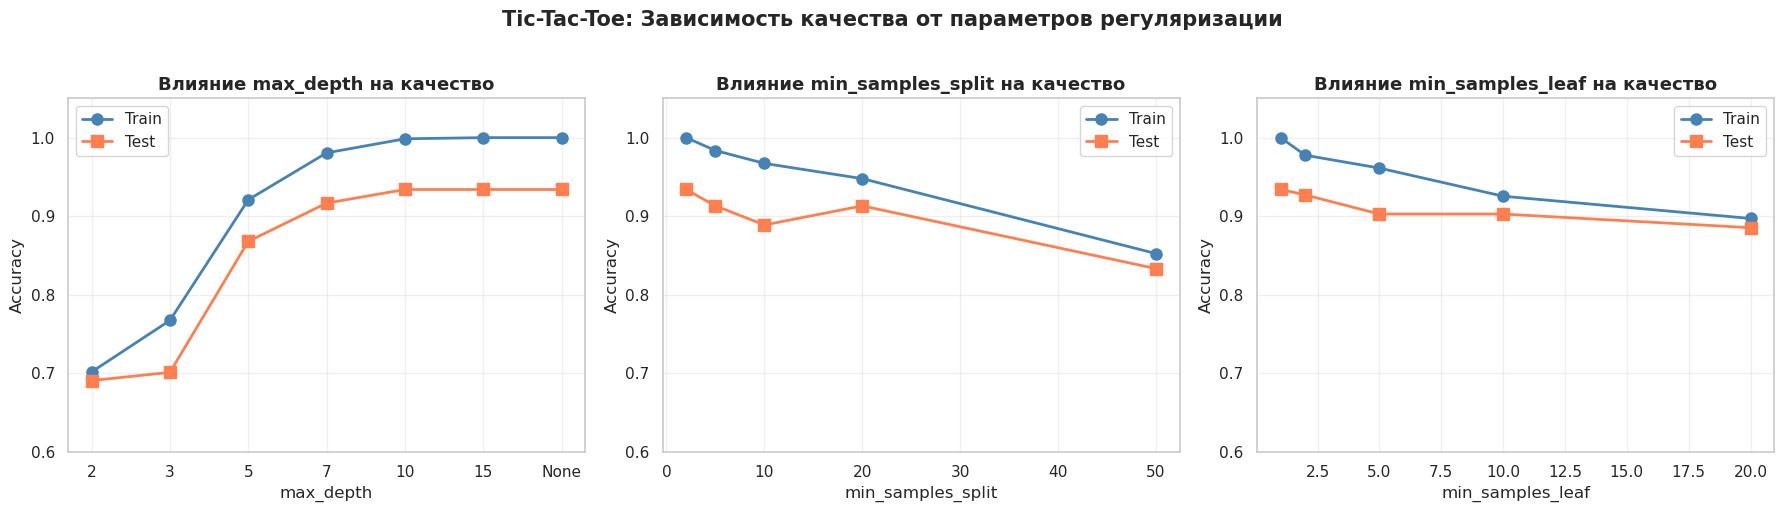

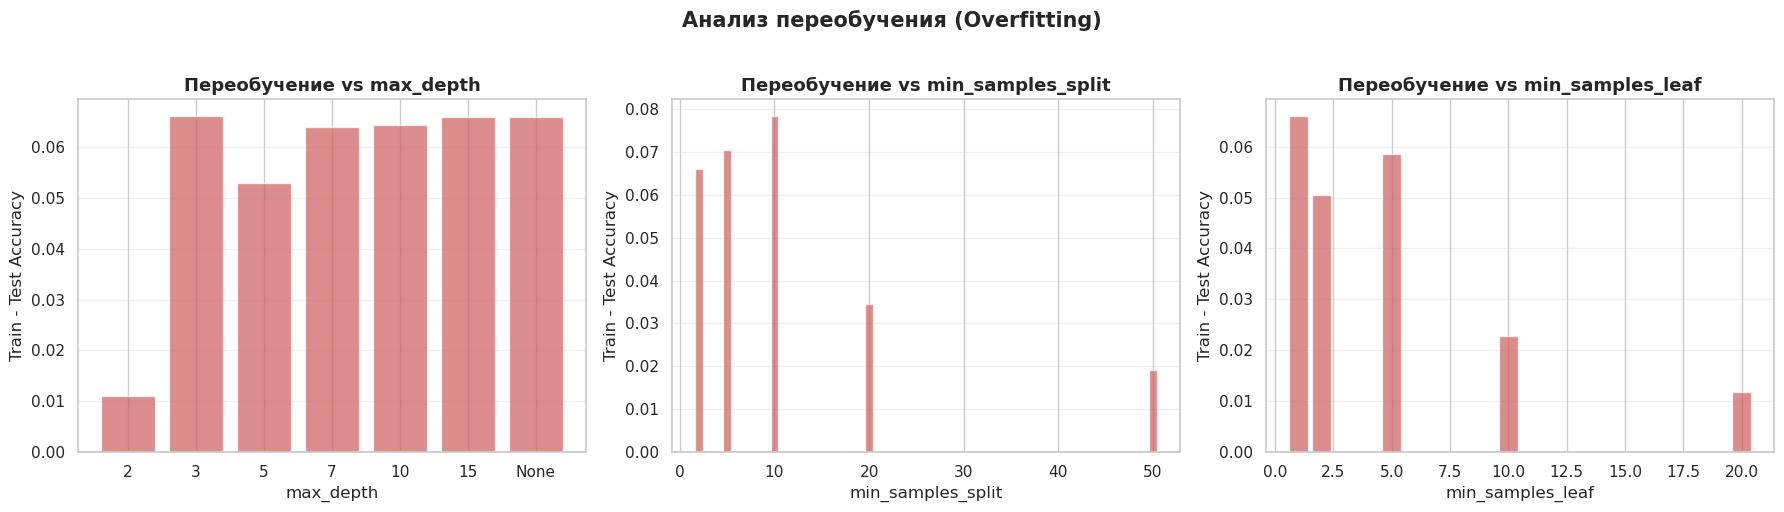

ВЫВОДЫ:

1. max_depth:
   Лучшее значение: 10
   Test accuracy: 0.9340
   Переобучение: 0.0645

2. min_samples_split:
   Лучшее значение: 2
   Test accuracy: 0.9340
   Переобучение: 0.0660

3. min_samples_leaf:
   Лучшее значение: 1
   Test accuracy: 0.9340
   Переобучение: 0.0660


In [47]:
from hw2code import DecisionTree
from sklearn.preprocessing import LabelEncoder

df_tictactoe = pd.read_csv('datasets/tic-tac-toe-endgame.csv', header=None)

print(f"\nРазмер датасета: {df_tictactoe.shape}")
print("\nПервые строки:")
print(df_tictactoe.head())

label_encoders_ttt = []
df_ttt_encoded = df_tictactoe.copy()

for col in df_tictactoe.columns:
    le = LabelEncoder()
    df_ttt_encoded[col] = le.fit_transform(df_tictactoe[col])
    label_encoders_ttt.append(le)

print(f"\nЦелевая переменная (последний столбец): {label_encoders_ttt[-1].classes_}")

X_ttt = df_ttt_encoded.iloc[:, :-1].values
y_ttt = df_ttt_encoded.iloc[:, -1].values

print(f"Размерность X: {X_ttt.shape}")
print(f"Распределение классов: {np.bincount(y_ttt)}")

X_train_ttt, X_test_ttt, y_train_ttt, y_test_ttt = train_test_split(
    X_ttt, y_ttt, test_size=0.3, random_state=42
)

print(f"\nTrain: {X_train_ttt.shape[0]} объектов")
print(f"Test:  {X_test_ttt.shape[0]} объектов")

max_depths = [2, 3, 5, 7, 10, 15, None]
min_samples_splits = [2, 5, 10, 20, 50]
min_samples_leaves = [1, 2, 5, 10, 20]

n_features_ttt = X_train_ttt.shape[1]
feature_types_categorical = ["categorical"] * n_features_ttt

print("\n" + "="*70)
print("ЭКСПЕРИМЕНТ 1: Влияние max_depth")
print("="*70)

train_scores_depth = []
test_scores_depth = []
depth_labels = []

for depth in max_depths:
    tree = DecisionTree(feature_types=feature_types_categorical, max_depth=depth)
    tree.fit(X_train_ttt, y_train_ttt)
    
    train_acc = accuracy_score(y_train_ttt, tree.predict(X_train_ttt))
    test_acc = accuracy_score(y_test_ttt, tree.predict(X_test_ttt))
    
    train_scores_depth.append(train_acc)
    test_scores_depth.append(test_acc)
    depth_labels.append(str(depth) if depth is not None else 'None')
    
    print(f"max_depth={str(depth):>4s}: Train={train_acc:.4f}, Test={test_acc:.4f}, "
          f"Diff={train_acc-test_acc:.4f}")

print("\n" + "="*70)
print("ЭКСПЕРИМЕНТ 2: Влияние min_samples_split")
print("="*70)

train_scores_split = []
test_scores_split = []

for min_split in min_samples_splits:
    tree = DecisionTree(feature_types=feature_types_categorical, min_samples_split=min_split)
    tree.fit(X_train_ttt, y_train_ttt)
    
    train_acc = accuracy_score(y_train_ttt, tree.predict(X_train_ttt))
    test_acc = accuracy_score(y_test_ttt, tree.predict(X_test_ttt))
    
    train_scores_split.append(train_acc)
    test_scores_split.append(test_acc)
    
    print(f"min_samples_split={min_split:2d}: Train={train_acc:.4f}, Test={test_acc:.4f}, "
          f"Diff={train_acc-test_acc:.4f}")

print("\n" + "="*70)
print("ЭКСПЕРИМЕНТ 3: Влияние min_samples_leaf")
print("="*70)

train_scores_leaf = []
test_scores_leaf = []

for min_leaf in min_samples_leaves:
    tree = DecisionTree(feature_types=feature_types_categorical, min_samples_leaf=min_leaf)
    tree.fit(X_train_ttt, y_train_ttt)
    
    train_acc = accuracy_score(y_train_ttt, tree.predict(X_train_ttt))
    test_acc = accuracy_score(y_test_ttt, tree.predict(X_test_ttt))
    
    train_scores_leaf.append(train_acc)
    test_scores_leaf.append(test_acc)
    
    print(f"min_samples_leaf={min_leaf:2d}: Train={train_acc:.4f}, Test={test_acc:.4f}, "
          f"Diff={train_acc-test_acc:.4f}")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(depth_labels, train_scores_depth, 'o-', label='Train', linewidth=2, markersize=8, color='steelblue')
axes[0].plot(depth_labels, test_scores_depth, 's-', label='Test', linewidth=2, markersize=8, color='coral')
axes[0].set_xlabel('max_depth', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Влияние max_depth на качество', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(alpha=0.3)
axes[0].set_ylim([0.6, 1.05])

axes[1].plot(min_samples_splits, train_scores_split, 'o-', label='Train', linewidth=2, markersize=8, color='steelblue')
axes[1].plot(min_samples_splits, test_scores_split, 's-', label='Test', linewidth=2, markersize=8, color='coral')
axes[1].set_xlabel('min_samples_split', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('Влияние min_samples_split на качество', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(alpha=0.3)
axes[1].set_ylim([0.6, 1.05])

axes[2].plot(min_samples_leaves, train_scores_leaf, 'o-', label='Train', linewidth=2, markersize=8, color='steelblue')
axes[2].plot(min_samples_leaves, test_scores_leaf, 's-', label='Test', linewidth=2, markersize=8, color='coral')
axes[2].set_xlabel('min_samples_leaf', fontsize=12)
axes[2].set_ylabel('Accuracy', fontsize=12)
axes[2].set_title('Влияние min_samples_leaf на качество', fontsize=13, fontweight='bold')
axes[2].legend(fontsize=11)
axes[2].grid(alpha=0.3)
axes[2].set_ylim([0.6, 1.05])

plt.suptitle('Tic-Tac-Toe: Зависимость качества от параметров регуляризации', 
             fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

overfit_depth = [train_scores_depth[i] - test_scores_depth[i] for i in range(len(depth_labels))]
overfit_split = [train_scores_split[i] - test_scores_split[i] for i in range(len(min_samples_splits))]
overfit_leaf = [train_scores_leaf[i] - test_scores_leaf[i] for i in range(len(min_samples_leaves))]

axes[0].bar(depth_labels, overfit_depth, color='indianred', alpha=0.7)
axes[0].set_xlabel('max_depth', fontsize=12)
axes[0].set_ylabel('Train - Test Accuracy', fontsize=12)
axes[0].set_title('Переобучение vs max_depth', fontsize=13, fontweight='bold')
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[0].grid(alpha=0.3, axis='y')

axes[1].bar(min_samples_splits, overfit_split, color='indianred', alpha=0.7)
axes[1].set_xlabel('min_samples_split', fontsize=12)
axes[1].set_ylabel('Train - Test Accuracy', fontsize=12)
axes[1].set_title('Переобучение vs min_samples_split', fontsize=13, fontweight='bold')
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1].grid(alpha=0.3, axis='y')

axes[2].bar(min_samples_leaves, overfit_leaf, color='indianred', alpha=0.7)
axes[2].set_xlabel('min_samples_leaf', fontsize=12)
axes[2].set_ylabel('Train - Test Accuracy', fontsize=12)
axes[2].set_title('Переобучение vs min_samples_leaf', fontsize=13, fontweight='bold')
axes[2].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[2].grid(alpha=0.3, axis='y')

plt.suptitle('Анализ переобучения (Overfitting)', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("ВЫВОДЫ:")
print("\n1. max_depth:")
best_idx = np.argmax(test_scores_depth)
print(f"   Лучшее значение: {depth_labels[best_idx]}")
print(f"   Test accuracy: {test_scores_depth[best_idx]:.4f}")
print(f"   Переобучение: {overfit_depth[best_idx]:.4f}")

print("\n2. min_samples_split:")
best_idx = np.argmax(test_scores_split)
print(f"   Лучшее значение: {min_samples_splits[best_idx]}")
print(f"   Test accuracy: {test_scores_split[best_idx]:.4f}")
print(f"   Переобучение: {overfit_split[best_idx]:.4f}")

print("\n3. min_samples_leaf:")
best_idx = np.argmax(test_scores_leaf)
print(f"   Лучшее значение: {min_samples_leaves[best_idx]}")
print(f"   Test accuracy: {test_scores_leaf[best_idx]:.4f}")
print(f"   Переобучение: {overfit_leaf[best_idx]:.4f}")



__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

Загрузка датасетов

1. Mushrooms:
   Размер: (8124, 23)
   Целевая переменная в столбце 0: ['p' 'e']

2. Tic-Tac-Toe:
   Размер: (959, 10)
   Целевая переменная в последнем столбце: ['V10' 'positive' 'negative']

3. Cars:
   Размер: (1728, 7)
   Целевая переменная: ['unacc' 'acc' 'vgood' 'good']
   Преобразуем: unacc, acc -> 0; good, vgood -> 1

4. Nursery:
   Размер: (7397, 9)
   Целевая переменная: ['recommend' 'priority' 'not_recom' 'very_recom' 'spec_prior' nan]
   Преобразуем: not_recom, recommend -> 0; very_recom, priority, spec_prior -> 1

Кодирование целевых переменных

Mushrooms: e=4208, p=3916
Tic-Tac-Toe: negative=333, positive=626
Cars: unacc/acc=1594, good/vgood=134
Nursery: not_recom/recommend=2468, very_recom/priority/spec_prior=4929

Кодирование признаков (LabelEncoder)

Mushrooms: (8124, 22), все признаки категориальные
Tic-Tac-Toe: (959, 9), все признаки категориальные
Cars: (1728, 6), все признаки категориальные
Nursery: (7397, 8), все признаки категориальные

One-Ho

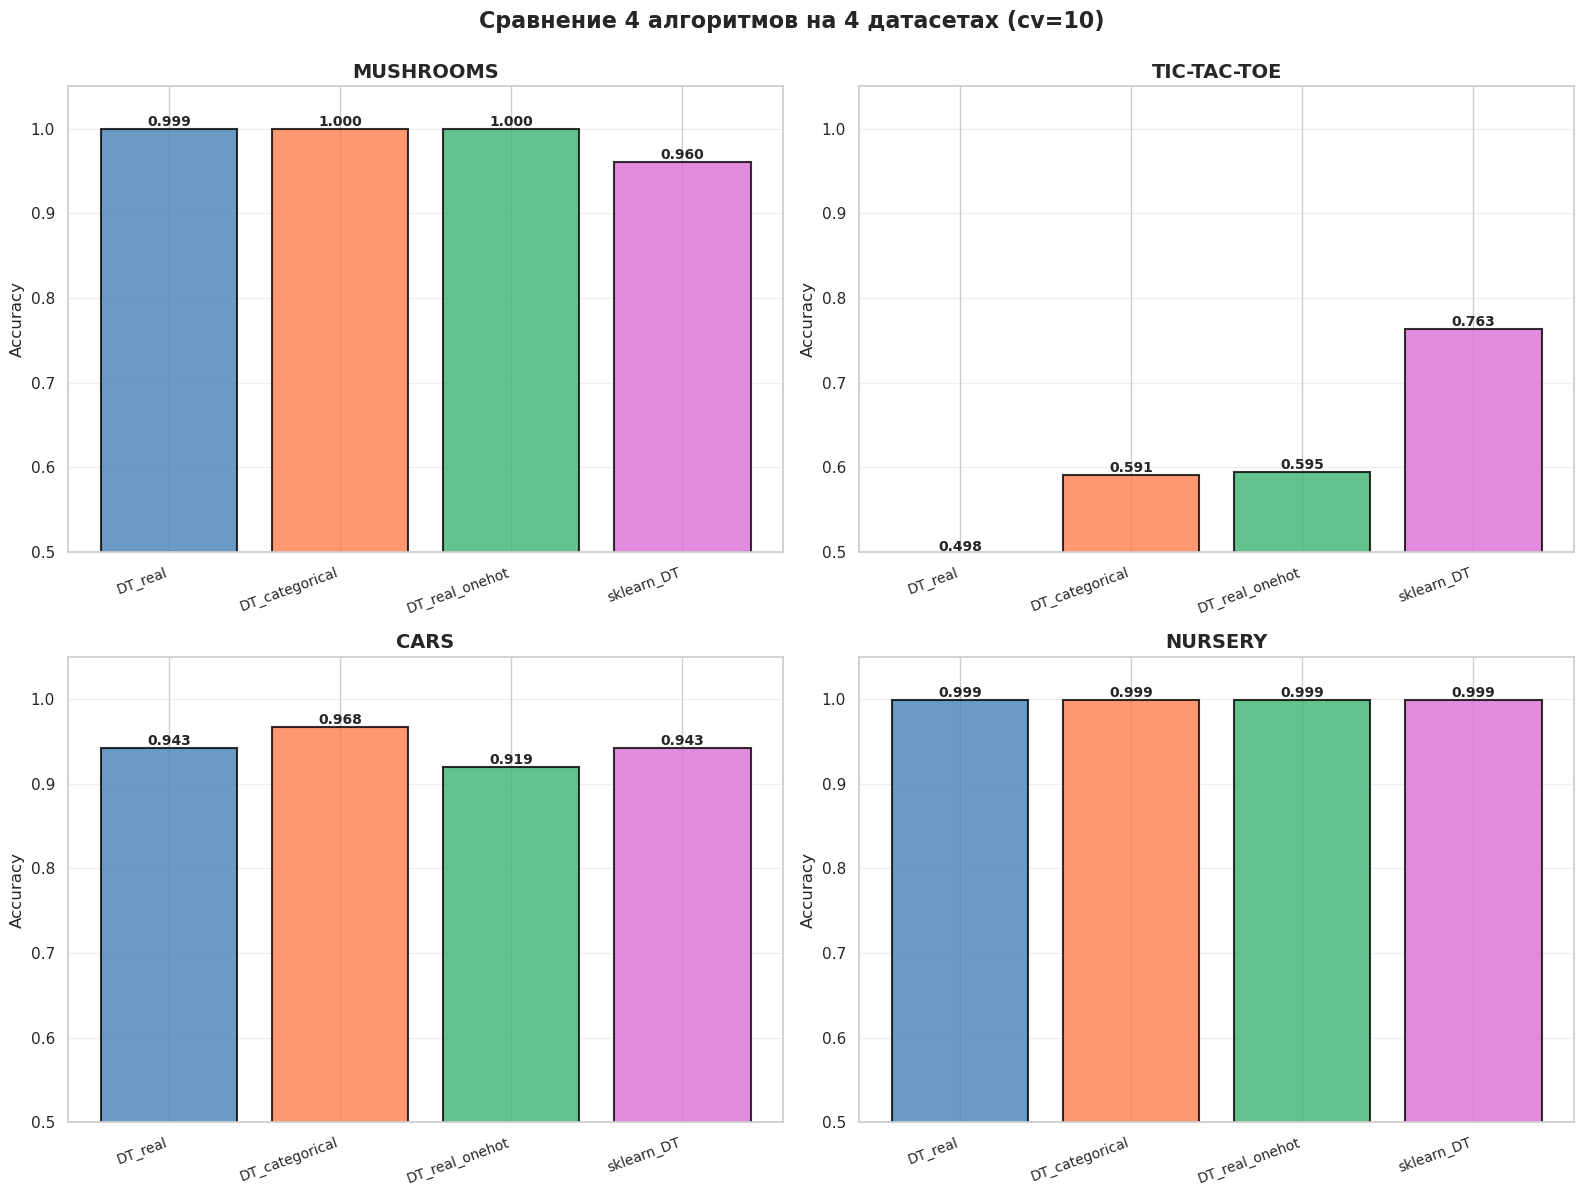

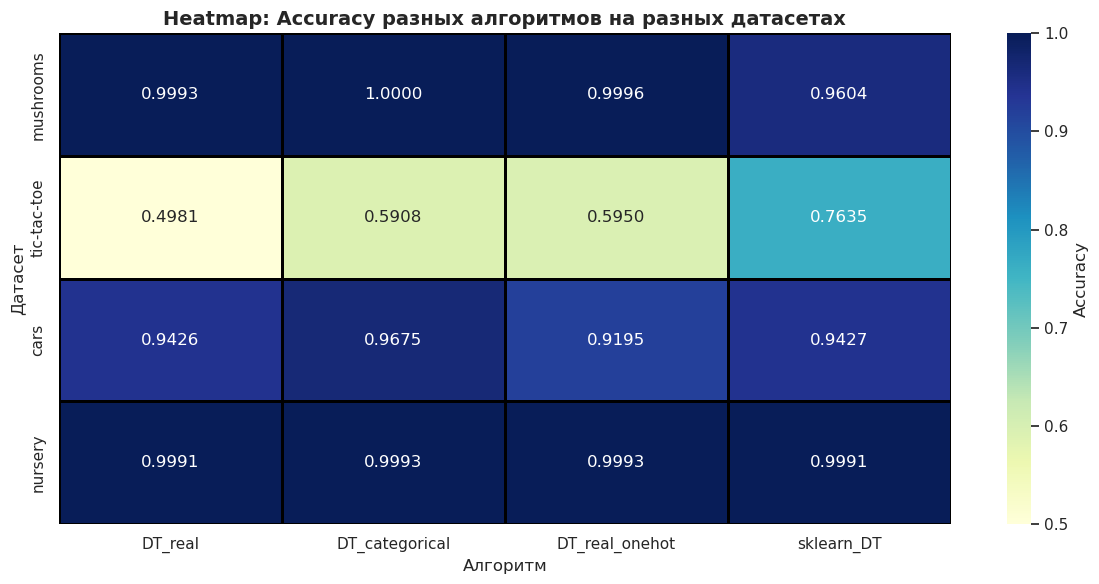

РАНЖИРОВАНИЕ АЛГОРИТМОВ ПО ДАТАСЕТАМ


             DT_real  DT_categorical  DT_real_onehot  sklearn_DT
Dataset                                                         
mushrooms        3.0             1.0             2.0         4.0
tic-tac-toe      4.0             3.0             2.0         1.0
cars             3.0             1.0             4.0         2.0
nursery          3.5             1.5             1.5         3.5


Средний ранг по всем датасетам:
DT_categorical    1.625
DT_real_onehot    2.375
sklearn_DT        2.625
DT_real           3.375

Лучший алгоритм в среднем: DT_categorical


In [46]:
from hw2code import DecisionTree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer


print("Загрузка датасетов")

print("\n1. Mushrooms:")
X_mushrooms_orig = pd.read_csv('datasets/agaricus-lepiota.data', header=None)
print(f"   Размер: {X_mushrooms_orig.shape}")
print(f"   Целевая переменная в столбце 0: {X_mushrooms_orig.iloc[:, 0].unique()}")

print("\n2. Tic-Tac-Toe:")
X_tictactoe_orig = pd.read_csv('datasets/tic-tac-toe-endgame.csv', header=None)
print(f"   Размер: {X_tictactoe_orig.shape}")
print(f"   Целевая переменная в последнем столбце: {X_tictactoe_orig.iloc[:, -1].unique()}")

print("\n3. Cars:")
cars_cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df_cars = pd.read_csv('datasets/car.data', header=None, names=cars_cols)
print(f"   Размер: {df_cars.shape}")
print(f"   Целевая переменная: {df_cars['class'].unique()}")
print(f"   Преобразуем: unacc, acc -> 0; good, vgood -> 1")

print("\n4. Nursery:")
nursery_cols = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class']
df_nursery = pd.read_csv('datasets/nursery.data', header=None, names=nursery_cols)
print(f"   Размер: {df_nursery.shape}")
print(f"   Целевая переменная: {df_nursery['class'].unique()}")
print(f"   Преобразуем: not_recom, recommend -> 0; very_recom, priority, spec_prior -> 1")

print("\nКодирование целевых переменных")

y_mushrooms_binary = (X_mushrooms_orig.iloc[:, 0] == 'p').astype(int).values
print(f"\nMushrooms: e={np.sum(y_mushrooms_binary==0)}, p={np.sum(y_mushrooms_binary==1)}")

y_tictactoe_binary = (X_tictactoe_orig.iloc[:, -1] == 'positive').astype(int).values
print(f"Tic-Tac-Toe: negative={np.sum(y_tictactoe_binary==0)}, positive={np.sum(y_tictactoe_binary==1)}")

y_cars_binary = df_cars['class'].isin(['good', 'vgood']).astype(int).values
print(f"Cars: unacc/acc={np.sum(y_cars_binary==0)}, good/vgood={np.sum(y_cars_binary==1)}")

y_nursery_binary = df_nursery['class'].isin(['very_recom', 'priority', 'spec_prior']).astype(int).values
print(f"Nursery: not_recom/recommend={np.sum(y_nursery_binary==0)}, very_recom/priority/spec_prior={np.sum(y_nursery_binary==1)}")

print("\nКодирование признаков (LabelEncoder)")

X_mushrooms_labeled = X_mushrooms_orig.iloc[:, 1:].copy()
for col in X_mushrooms_labeled.columns:
    le = LabelEncoder()
    X_mushrooms_labeled[col] = le.fit_transform(X_mushrooms_orig.iloc[:, 1:][col])
X_mushrooms_labeled = X_mushrooms_labeled.values
print(f"\nMushrooms: {X_mushrooms_labeled.shape}, все признаки категориальные")

X_tictactoe_labeled = X_tictactoe_orig.iloc[:, :-1].copy()
for col in X_tictactoe_labeled.columns:
    le = LabelEncoder()
    X_tictactoe_labeled[col] = le.fit_transform(X_tictactoe_orig.iloc[:, :-1][col])
X_tictactoe_labeled = X_tictactoe_labeled.values
print(f"Tic-Tac-Toe: {X_tictactoe_labeled.shape}, все признаки категориальные")

X_cars_labeled = df_cars.iloc[:, :-1].copy()
for col in X_cars_labeled.columns:
    le = LabelEncoder()
    X_cars_labeled[col] = le.fit_transform(df_cars[col])
X_cars_labeled = X_cars_labeled.values
print(f"Cars: {X_cars_labeled.shape}, все признаки категориальные")

X_nursery_labeled = df_nursery.iloc[:, :-1].copy()
for col in X_nursery_labeled.columns:
    le = LabelEncoder()
    X_nursery_labeled[col] = le.fit_transform(df_nursery[col])
X_nursery_labeled = X_nursery_labeled.values
print(f"Nursery: {X_nursery_labeled.shape}, все признаки категориальные")

print("\nOne-Hot Encoding признаков")

def apply_onehot(X_labeled):
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    X_onehot = encoder.fit_transform(X_labeled)
    return X_onehot

X_mushrooms_onehot = apply_onehot(X_mushrooms_labeled)
X_tictactoe_onehot = apply_onehot(X_tictactoe_labeled)
X_cars_onehot = apply_onehot(X_cars_labeled)
X_nursery_onehot = apply_onehot(X_nursery_labeled)

print(f"\nMushrooms OneHot: {X_mushrooms_onehot.shape}")
print(f"Tic-Tac-Toe OneHot: {X_tictactoe_onehot.shape}")
print(f"Cars OneHot: {X_cars_onehot.shape}")
print(f"Nursery OneHot: {X_nursery_onehot.shape}")


datasets_dict = {
    'mushrooms': {
        'X_labeled': X_mushrooms_labeled,
        'X_onehot': X_mushrooms_onehot,
        'y': y_mushrooms_binary,
        'n_features': X_mushrooms_labeled.shape[1]
    },
    'tic-tac-toe': {
        'X_labeled': X_tictactoe_labeled,
        'X_onehot': X_tictactoe_onehot,
        'y': y_tictactoe_binary,
        'n_features': X_tictactoe_labeled.shape[1]
    },
    'cars': {
        'X_labeled': X_cars_labeled,
        'X_onehot': X_cars_onehot,
        'y': y_cars_binary,
        'n_features': X_cars_labeled.shape[1]
    },
    'nursery': {
        'X_labeled': X_nursery_labeled,
        'X_onehot': X_nursery_onehot,
        'y': y_nursery_binary,
        'n_features': X_nursery_labeled.shape[1]
    }
}


print("\nКросс-валидация (cv=10) для 4 алгоритмов на 4 датасетах")

results_list = []
scorer = make_scorer(accuracy_score)

for dataset_name, data in datasets_dict.items():
    print(f"\n{'='*80}")
    print(f"Датасет: {dataset_name.upper()}")
    print(f"{'='*80}")
    
    X_labeled = data['X_labeled']
    X_onehot = data['X_onehot']
    y = data['y']
    n_features = data['n_features']
    
    print(f"\n  1. DecisionTree (real features)...")
    feature_types_real = ['real'] * n_features
    clf1 = DecisionTree(feature_types=feature_types_real)
    scores1 = cross_val_score(clf1, X_labeled, y, cv=10, scoring=scorer)
    mean1 = scores1.mean()
    std1 = scores1.std()
    print(f"     Accuracy: {mean1:.4f} ± {std1:.4f}")
    
    print(f"  2. DecisionTree (categorical features)...")
    feature_types_cat = ['categorical'] * n_features
    clf2 = DecisionTree(feature_types=feature_types_cat)
    scores2 = cross_val_score(clf2, X_labeled, y, cv=10, scoring=scorer)
    mean2 = scores2.mean()
    std2 = scores2.std()
    print(f"     Accuracy: {mean2:.4f} ± {std2:.4f}")
    
    print(f"  3. DecisionTree (real + OneHot)...")
    feature_types_real_onehot = ['real'] * X_onehot.shape[1]
    clf3 = DecisionTree(feature_types=feature_types_real_onehot)
    scores3 = cross_val_score(clf3, X_onehot, y, cv=10, scoring=scorer)
    mean3 = scores3.mean()
    std3 = scores3.std()
    print(f"     Accuracy: {mean3:.4f} ± {std3:.4f}")
    
    print(f"  4. sklearn DecisionTreeClassifier...")
    clf4 = DecisionTreeClassifier(random_state=42)
    scores4 = cross_val_score(clf4, X_labeled, y, cv=10, scoring=scorer)
    mean4 = scores4.mean()
    std4 = scores4.std()
    print(f"     Accuracy: {mean4:.4f} ± {std4:.4f}")
    
    results_list.append({
        'Dataset': dataset_name,
        'DT_real': mean1,
        'DT_categorical': mean2,
        'DT_real_onehot': mean3,
        'sklearn_DT': mean4
    })

print("\nСредняя accuracy по 10 фолдам")

results_df = pd.DataFrame(results_list)
results_df = results_df.set_index('Dataset')

print("\n")
print(results_df.to_string())


fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

dataset_names_ordered = ['mushrooms', 'tic-tac-toe', 'cars', 'nursery']
colors = ['steelblue', 'coral', 'mediumseagreen', 'orchid']

for i, dataset_name in enumerate(dataset_names_ordered):
    ax = axes[i]
    row = results_df.loc[dataset_name]
    
    algorithms = row.index
    scores = row.values
    
    bars = ax.bar(algorithms, scores, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
    
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.set_title(f'{dataset_name.upper()}', fontsize=14, fontweight='bold')
    ax.set_ylim([0.5, 1.05])
    ax.grid(axis='y', alpha=0.3)
    ax.set_xticklabels(algorithms, rotation=20, ha='right', fontsize=10)
    
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.suptitle('Сравнение 4 алгоритмов на 4 датасетах (cv=10)', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(results_df, annot=True, fmt='.4f', cmap='YlGnBu', cbar_kws={'label': 'Accuracy'}, 
            linewidths=1, linecolor='black', ax=ax, vmin=0.5, vmax=1.0)
ax.set_title('Heatmap: Accuracy разных алгоритмов на разных датасетах', fontsize=14, fontweight='bold')
ax.set_xlabel('Алгоритм', fontsize=12)
ax.set_ylabel('Датасет', fontsize=12)
plt.tight_layout()
plt.show()

print("РАНЖИРОВАНИЕ АЛГОРИТМОВ ПО ДАТАСЕТАМ")

ranks_df = results_df.rank(axis=1, ascending=False)
print("\n")
print(ranks_df.to_string())

print("\n\nСредний ранг по всем датасетам:")
mean_ranks = ranks_df.mean(axis=0).sort_values()
print(mean_ranks.to_string())
print(f"\nЛучший алгоритм в среднем: {mean_ranks.index[0]}")

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

### 1. Одинаково ли для разных наборов данных ранжируются алгоритмы?

Нет, результаты сильно отличаются в зависимости от датасета.

**Mushrooms:**
- Почти все методы показали отличные результаты (0.999-1.000)
- DT_categorical и DT_real_onehot немного лучше (1.000)
- Sklearn показал чуть хуже (0.960)

**Tic-Tac-Toe:**
- Здесь картина совсем другая - sklearn лучший (0.763)
- DT_real показал очень плохой результат (0.498) - хуже случайного угадывания
- DT_categorical и DT_real_onehot примерно одинаковы (~0.59)

**Cars:**
- DT_categorical лучший (0.968)
- DT_real и sklearn близки (0.943)
- DT_real_onehot чуть хуже (0.919)

**Nursery:**
- Все методы показали практически идентичные результаты (~0.999)
- Видимо, этот датасет очень простой

**Средний ранг:**
1. DT_categorical (1.625) - лучший в среднем
2. DT_real_onehot (2.375)
3. sklearn_DT (2.625)
4. DT_real (3.375) - худший

### 2. Почему так происходит?

Всё зависит от **типа признаков** в данных.

**Mushrooms (грибы):**
- Признаки категориальные: цвет шляпки, форма, запах и т.д.
- Когда мы применяем LabelEncoder, он превращает их в числа (красный=0, синий=1, зеленый=2)
- Проблема DT_real: считает, что зеленый > синий > красный, хотя это не имеет смысла
- DT_categorical правильно понимает, что это просто разные категории
- DT_real_onehot тоже хорош - каждый цвет становится отдельным признаком (1 или 0)

**Tic-Tac-Toe:**
- Признаки: позиции поля (x, o, b - пусто)
- DT_real провалился, потому что считал x > o > b как числа, что бессмысленно
- Sklearn использует более продвинутые алгоритмы и лучше справляется
- Наша реализация работает хуже из-за отсутствия оптимизаций

**Cars:**
- Здесь признаки имеют порядок! (low < med < high < vhigh для цены)
- LabelEncoder сохраняет этот порядок, поэтому DT_real работает хорошо
- DT_categorical ещё лучше, так как правильно обрабатывает все варианты
- DT_real_onehot теряет информацию о порядке

**Nursery:**
- Простая задача, любой метод справляется отлично

### 3. Значение признаков

Главный вывод: **важно понимать природу признаков**:
- Если признаки номинальные (цвет, название) => лучше использовать categorical или onehot
- Если признаки ординальные (размер: маленький < средний < большой) => можно использовать real
- Если признаки бинарные (да/нет) => real подходит

### 4. Случайность в результатах

Да, случайность присутствует:

1. **Кросс-валидация** делит данные на 10 фолдов случайно => немного разные результаты
2. **Порядок обработки данных** может влиять на построение дерева
3. Sklearn использует random_state=42, поэтому его результаты воспроизводимы
4. Наша реализация не фиксирует random_state => при повторных запусках могут быть небольшие отличия

Это видно по разным датасетам:
- Mushrooms и Nursery: случайность мала (результаты стабильны ~1.0)
- Tic-Tac-Toe: больше вариации, так как задача сложнее

### 5. Как можно улучшить?

**Уменьшить случайность:**
- Добавить random_state в нашу реализацию DecisionTree
- Использовать StratifiedKFold вместо обычной CV (сохраняет пропорции классов)
- Увеличить количество фолдов (cv=20 вместо cv=10)

**Улучшить качество:**
1. **Выбирать правильное кодирование** в зависимости от типа признаков
2. **Добавить регуляризацию:** max_depth, min_samples_leaf - чтобы не переобучаться
3. **Настраивать параметры** под каждый датасет отдельно
4. **Использовать ансамбли** (например, Random Forest) - усреднение множества деревьев даёт более стабильные результаты

**Выводы:**
- Нет одного "лучшего" метода для всех датасетов
- DT_categorical в среднем лучше, потому что правильно работает с категориями
- Важно понимать данные перед выбором метода кодирования
- Случайность можно контролировать через правильные настройки

Вставьте что угодно, описывающее ваши впечатления от этого задания: